___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Decision Trees

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## EDA

### Missing Data

Recall the purpose is to create a model for future use, so data points missing crucial information won't help in this task, especially since for future data points we will assume the research will grab the relevant feature information.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
#df.dropna()

In [8]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [12]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [16]:
df.at[336,'sex']='FEMALE'

In [17]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm       217
body_mass_g            4875
sex                  FEMALE
Name: 336, dtype: object

In [18]:
#df = df[df['sex']!='.']

## Visualization

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

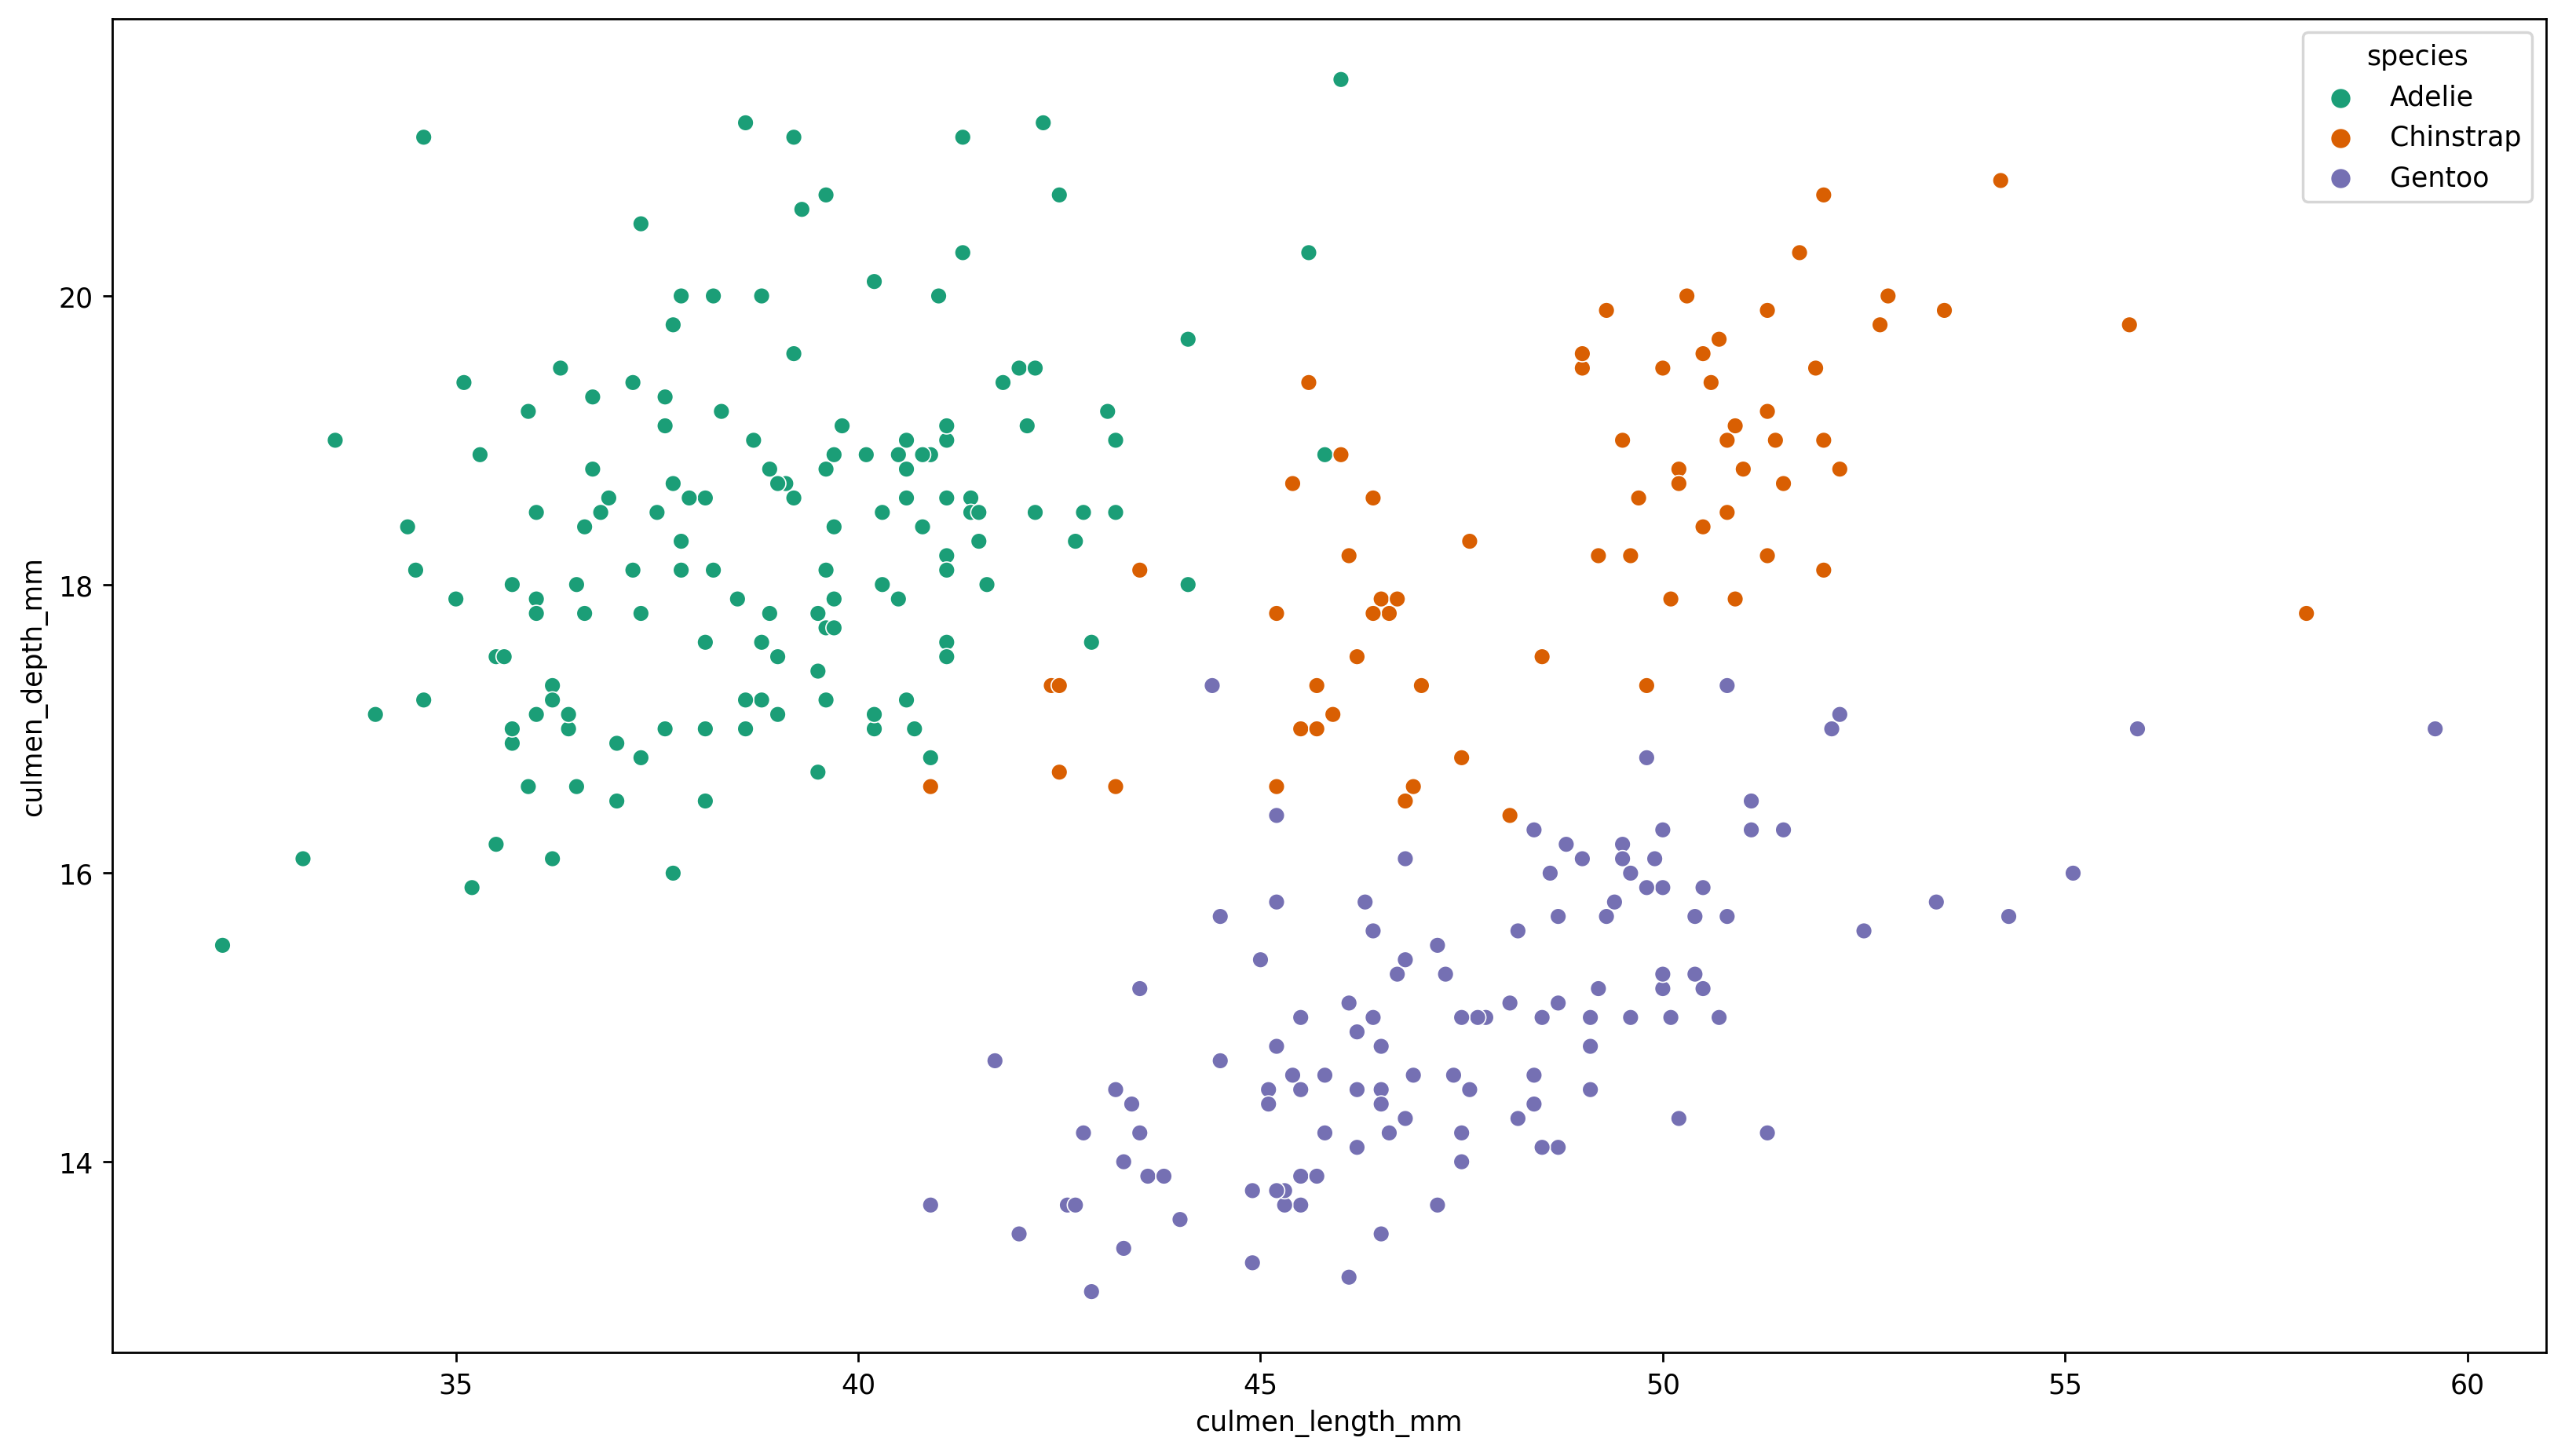

In [19]:
plt.figure(figsize=(16,9),dpi=250)
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

<Figure size 4000x2250 with 0 Axes>

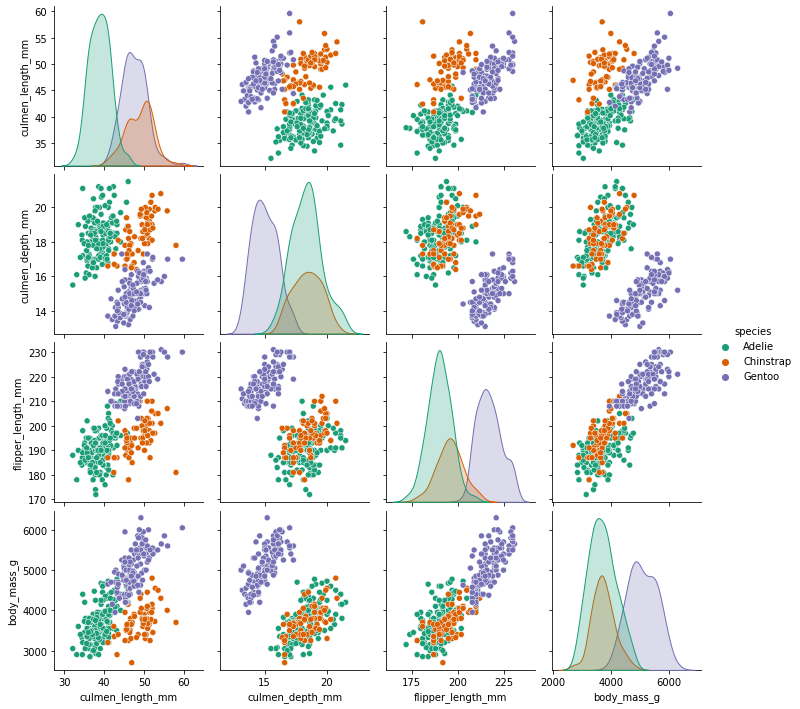

In [20]:
plt.figure(figsize=(16,9),dpi=250)
sns.pairplot(df,hue='species',palette='Dark2')

<Figure size 4000x2250 with 0 Axes>

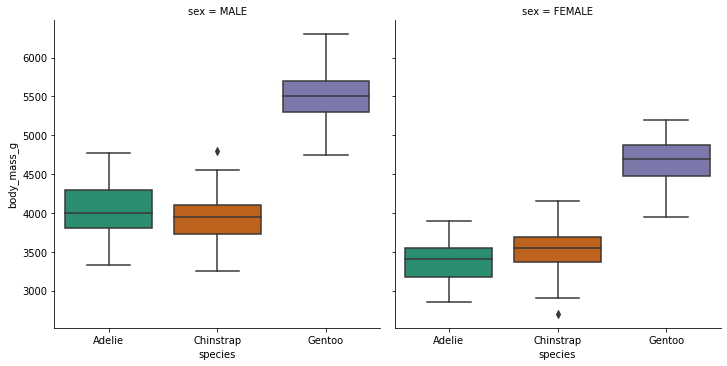

In [21]:
plt.figure(figsize=(16,9),dpi=250)
sns.catplot(x='species',y='body_mass_g',data=df,kind='box',col='sex',palette='Dark2')

<Figure size 4000x2250 with 0 Axes>

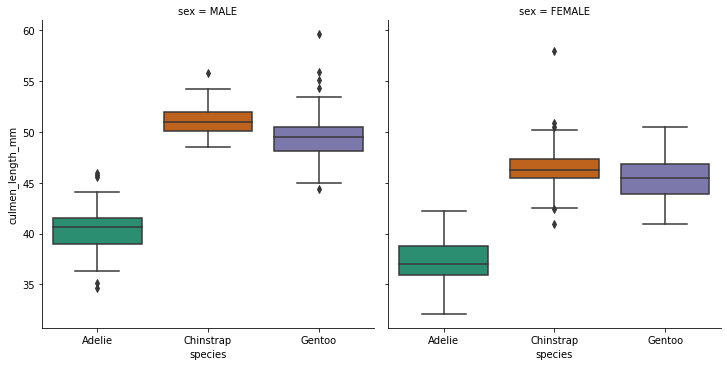

In [22]:
plt.figure(figsize=(16,9),dpi=250)
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

<Figure size 4000x2250 with 0 Axes>

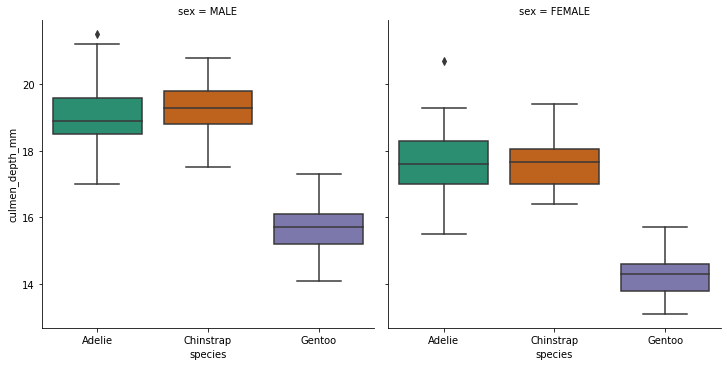

In [23]:
plt.figure(figsize=(16,9),dpi=250)
sns.catplot(x='species',y='culmen_depth_mm',data=df,kind='box',col='sex',palette='Dark2')

<Figure size 4000x2250 with 0 Axes>

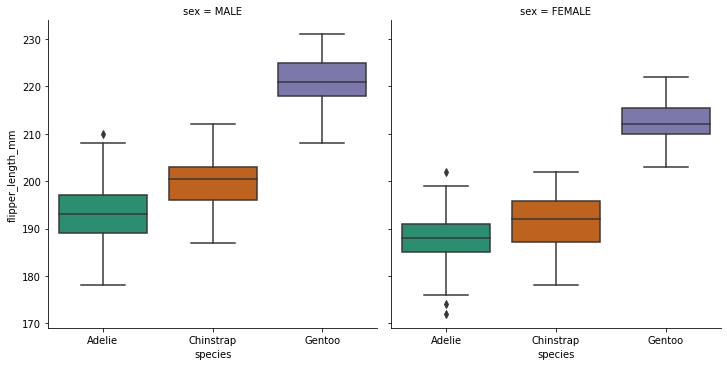

In [24]:
plt.figure(figsize=(16,9),dpi=250)
sns.catplot(x='species',y='flipper_length_mm',data=df,kind='box',col='sex',palette='Dark2')

<AxesSubplot:xlabel='island', ylabel='count'>

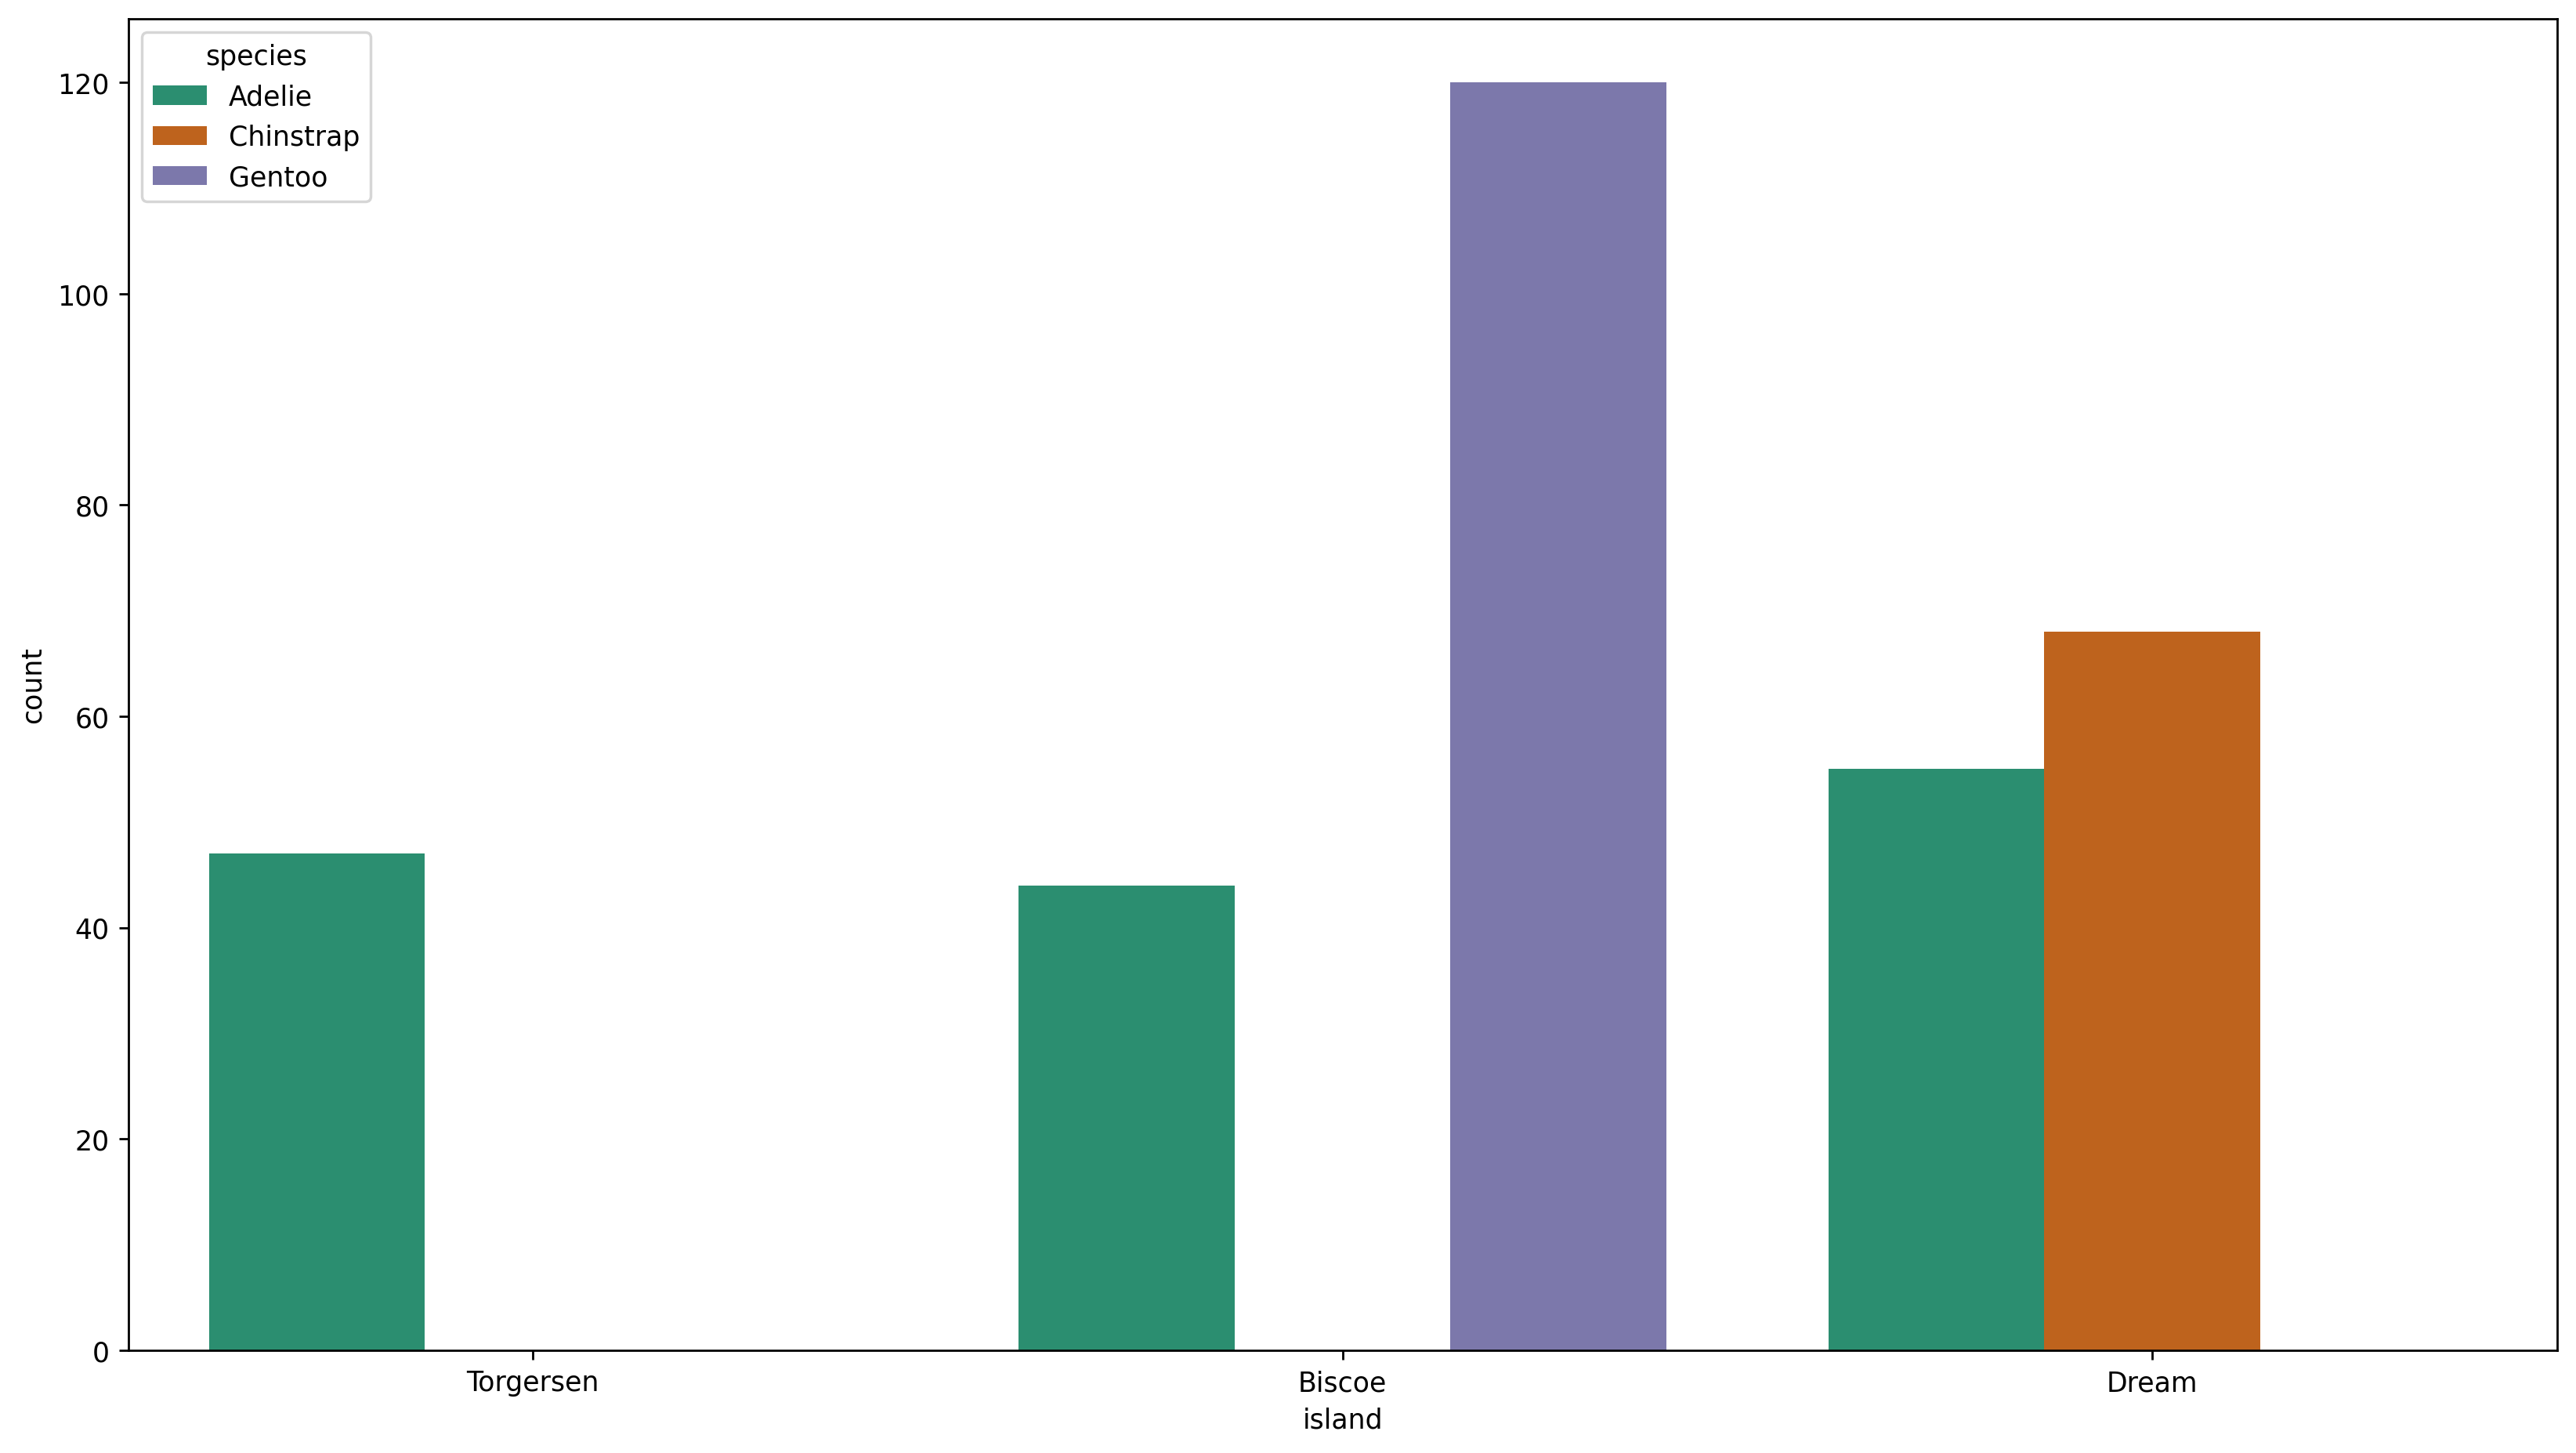

In [25]:
plt.figure(figsize=(16,9),dpi=250)
sns.countplot(x='island',data=df,hue='species',palette='Dark2')

## Feature Engineering

In [26]:
#pd.get_dummies(df)

In [27]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

## Train | Test Split

In [28]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13)

# Decision Tree Classifier

## Default Hyperparameters

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()

In [33]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
base_pred = model.predict(X_test)

## Evaluation

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [36]:
confusion_matrix(y_test,base_pred)

array([[52,  3,  0],
       [ 0, 22,  0],
       [ 0,  1, 33]], dtype=int64)

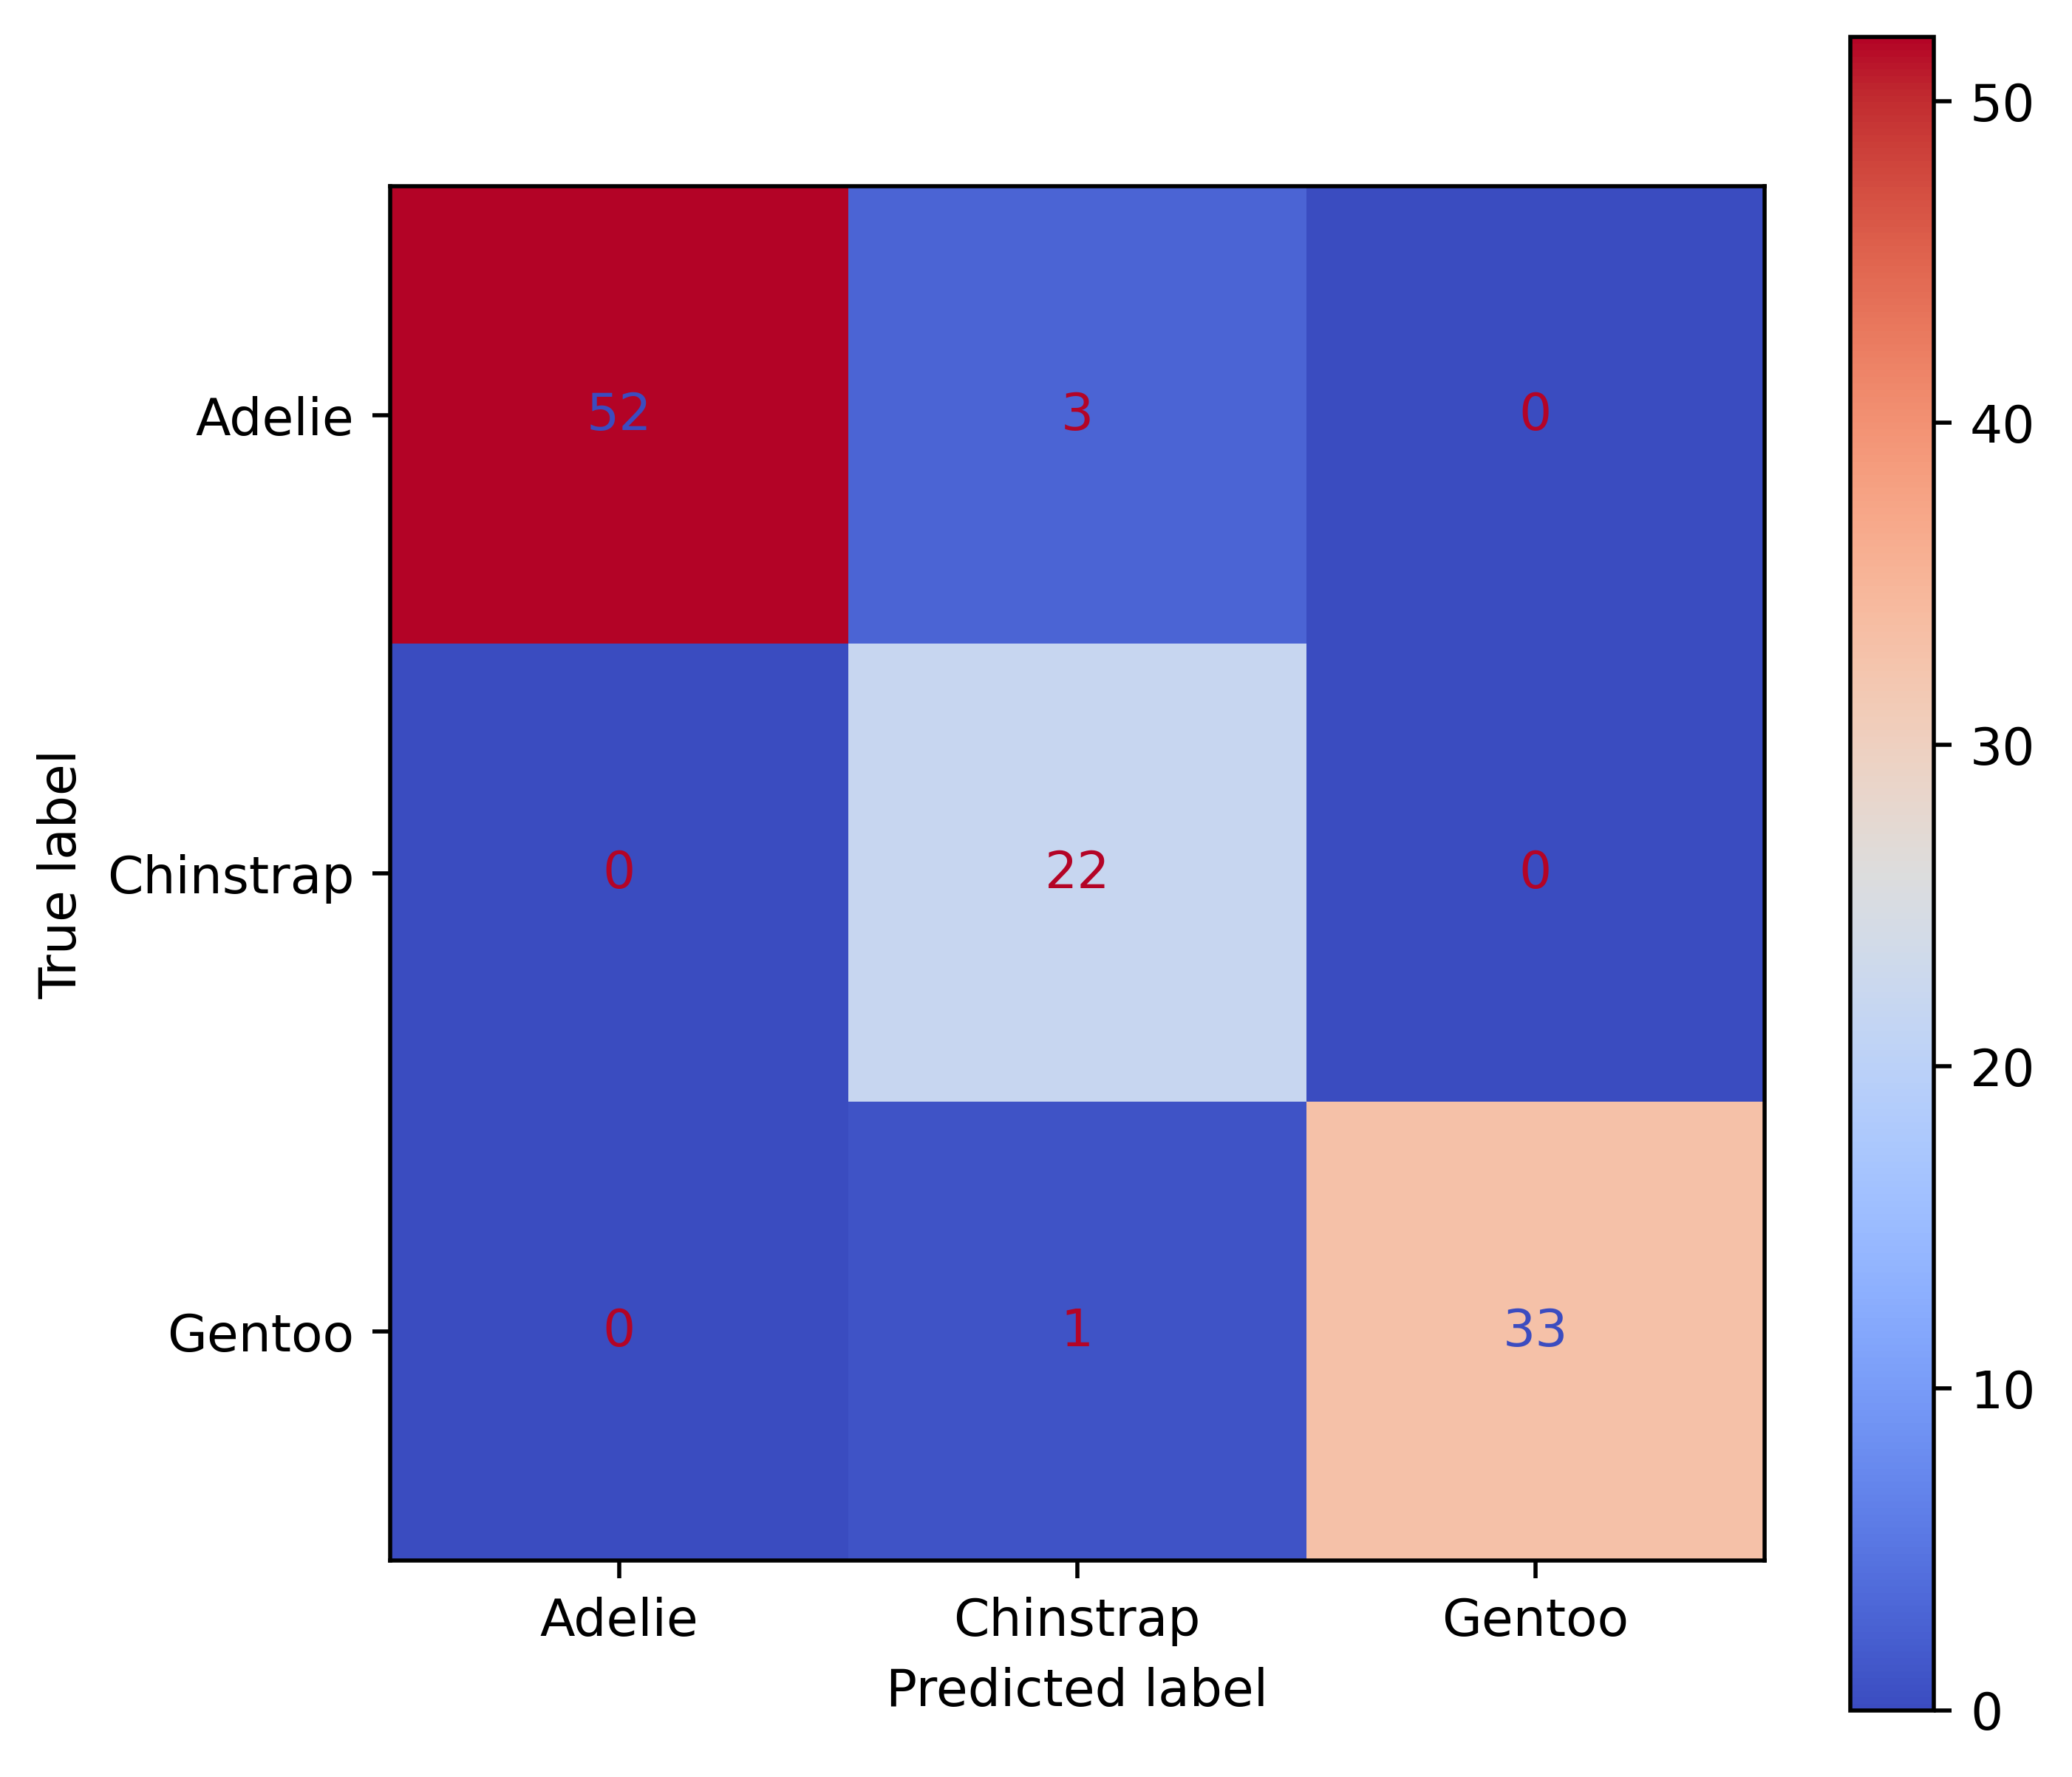

In [37]:
fig, ax = plt.subplots(figsize=(6,6),dpi=500)
plot_confusion_matrix(model,X_test,y_test,cmap='coolwarm',ax=ax)

In [38]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        55
   Chinstrap       0.85      1.00      0.92        22
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.96       111
   macro avg       0.95      0.97      0.96       111
weighted avg       0.97      0.96      0.97       111



In [39]:
model.feature_importances_

array([0.37517977, 0.06558893, 0.52819701, 0.03103429, 0.        ,
       0.        , 0.        ])

In [40]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

Feature Importance
island_Dream                 0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000
body_mass_g                  0.031034
culmen_depth_mm              0.065589
culmen_length_mm             0.375180
flipper_length_mm            0.528197

## Visualize the Tree

This function is fairly new, you may want to review the online docs:

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [41]:
from sklearn.tree import plot_tree

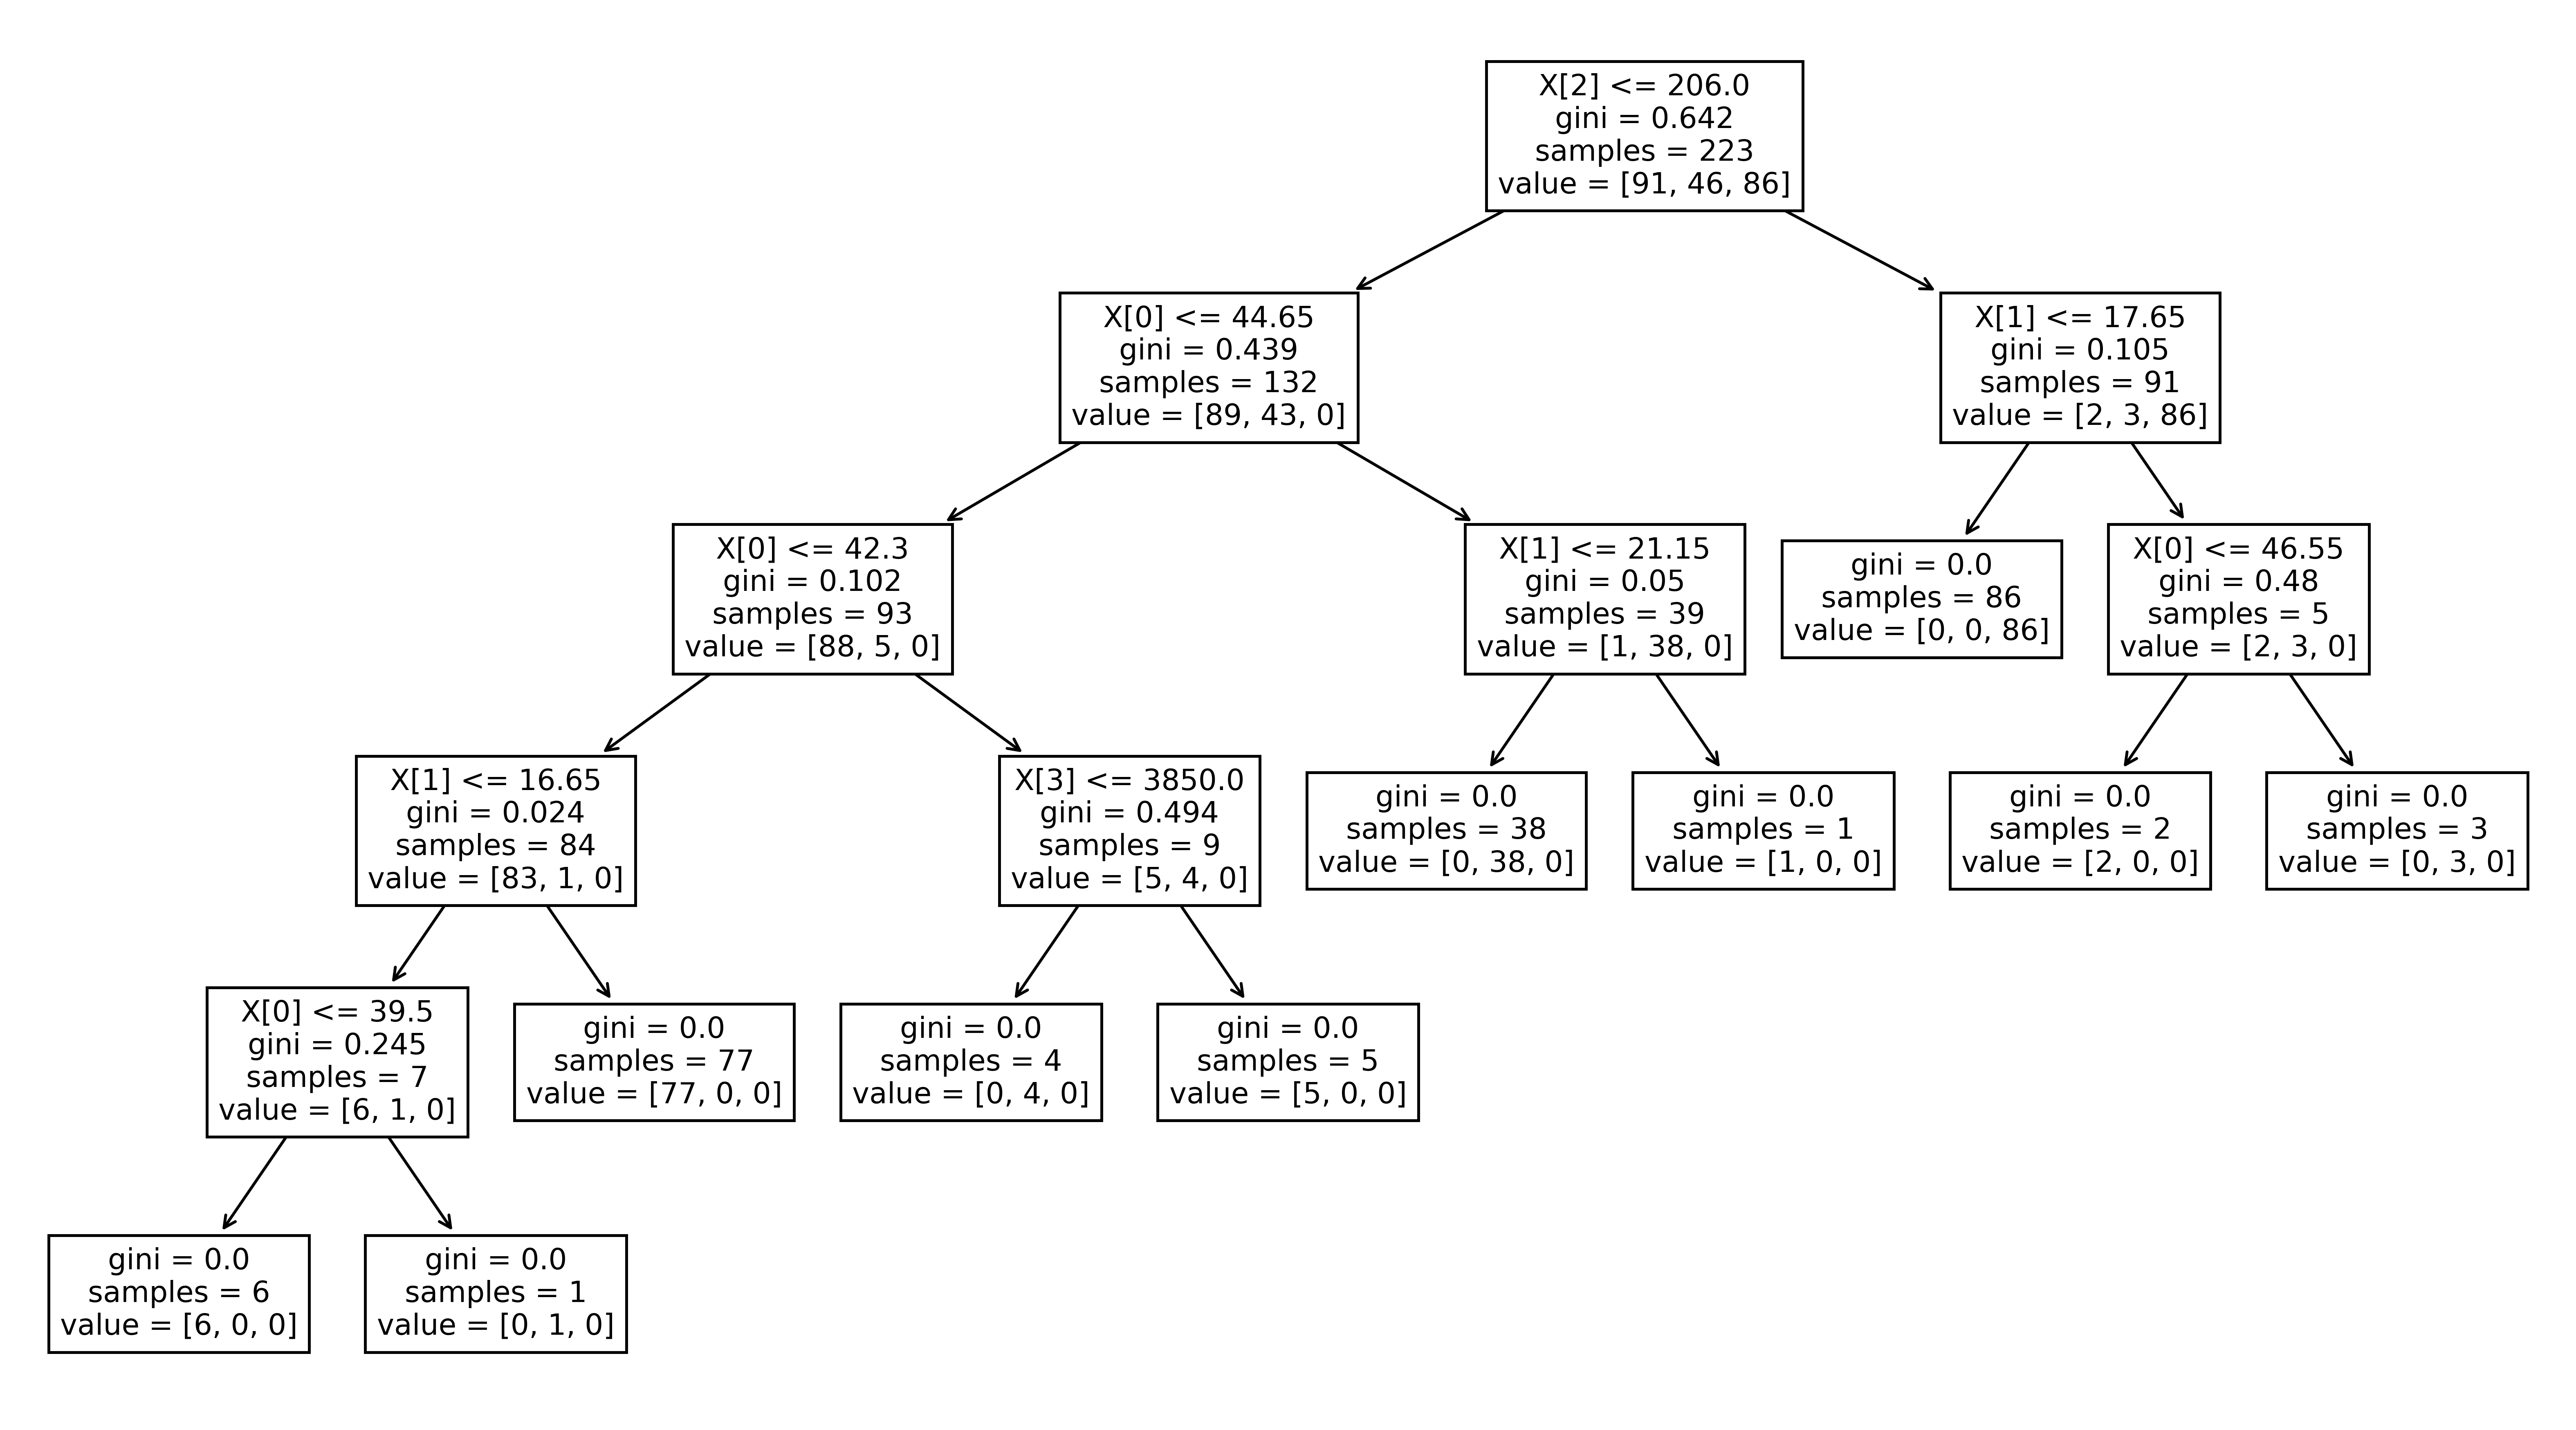

In [42]:
plt.figure(figsize=(16,9),dpi=500)
plot_tree(model);

In [43]:
X_train

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
215              55.8             19.8              207.0       4000.0   
90               35.7             18.0              202.0       3550.0   
280              45.3             13.8              208.0       4200.0   
171              49.2             18.2              195.0       4400.0   
72               39.6             17.2              196.0       3550.0   
..                ...              ...                ...          ...   
251              42.8             14.2              209.0       4700.0   
236              42.0             13.5              210.0       4150.0   
21               37.7             18.7              180.0       3600.0   
80               34.6             17.2              189.0       3200.0   
182              40.9             16.6              187.0       3200.0   

     island_Dream  island_Torgersen  sex_MALE  
215             1                 0         1  
90              1                 0         0  
280             0                 0         0  
171             1                 0         1  
72              0                 1         0  
..            ...               ...       ...  
251             0                 0         0  
236             0                 0         0  
21              0                 0         1  
80              0                 1         0  
182             1                 0         0  

[223 rows x 7 columns]

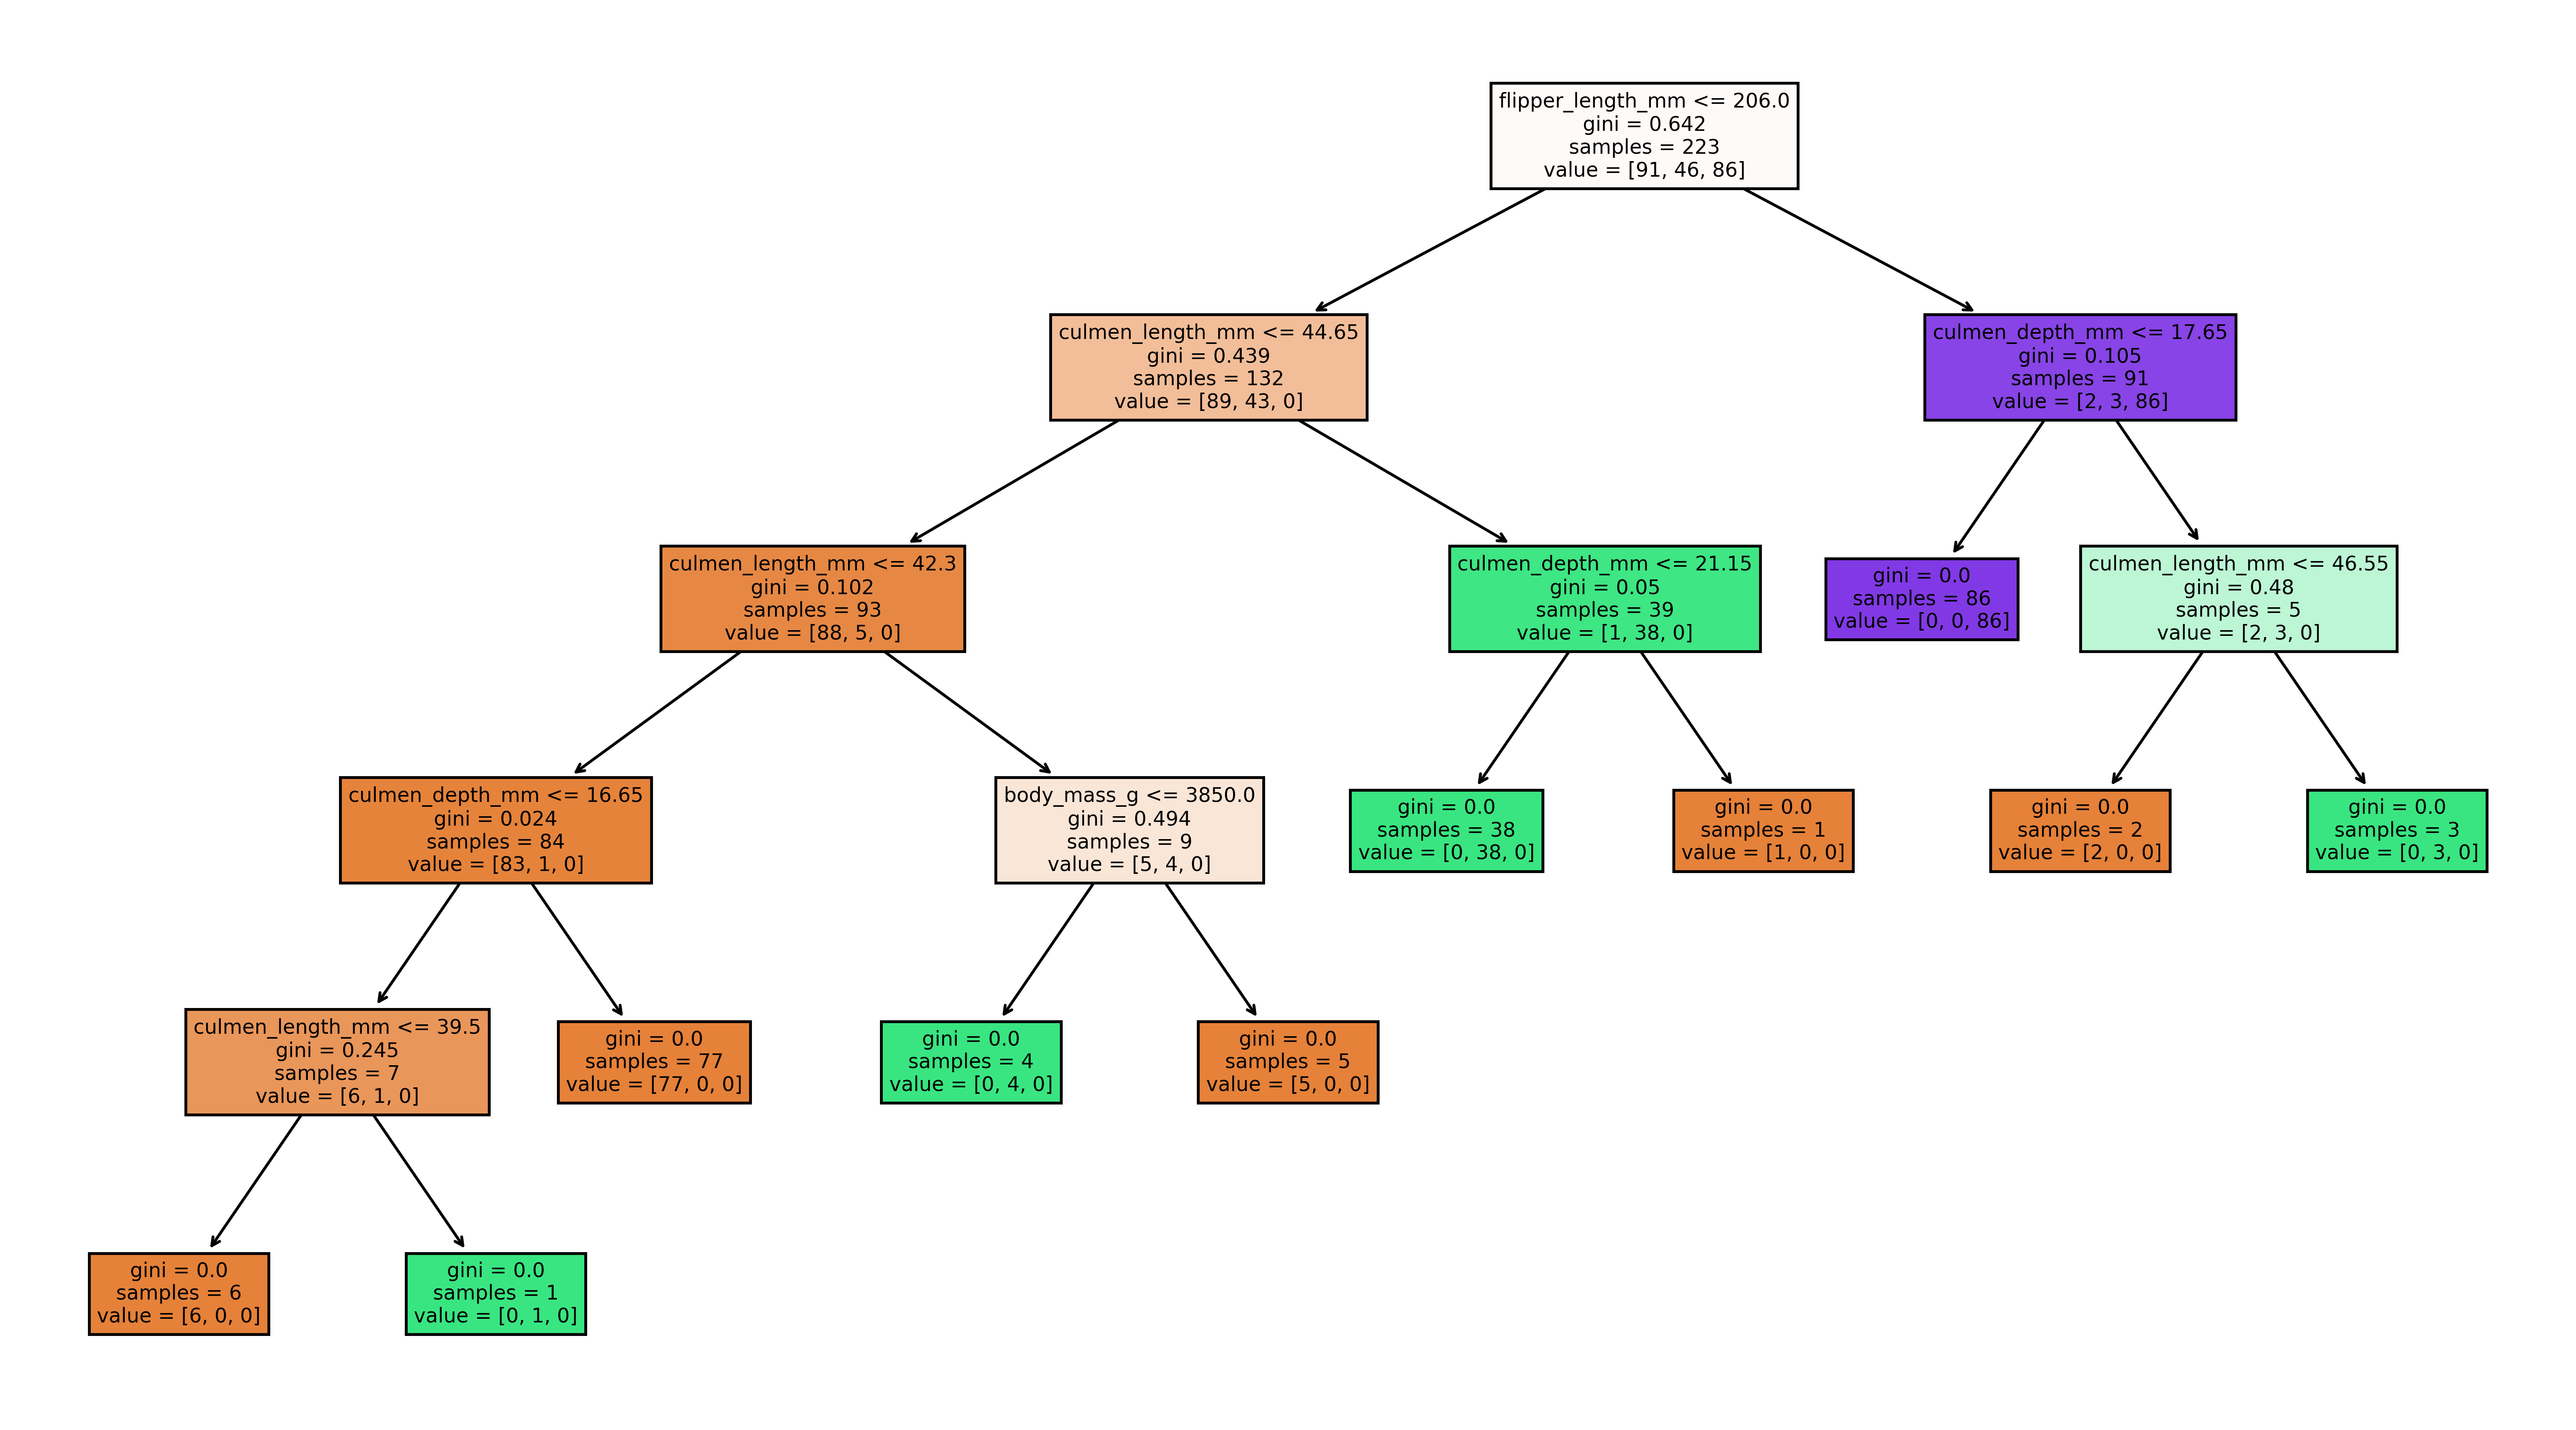

In [44]:
plt.figure(figsize=(16,9),dpi=500)
plot_tree(model,filled=True,feature_names=X.columns);

## Reporting Model Results

To begin experimenting with hyperparameters, let's create a function that reports back classification results and plots out the tree.

In [45]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(16,9),dpi=500)
    plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        55
   Chinstrap       0.85      1.00      0.92        22
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.96       111
   macro avg       0.95      0.97      0.96       111
weighted avg       0.97      0.96      0.97       111





<Figure size 8000x4500 with 0 Axes>

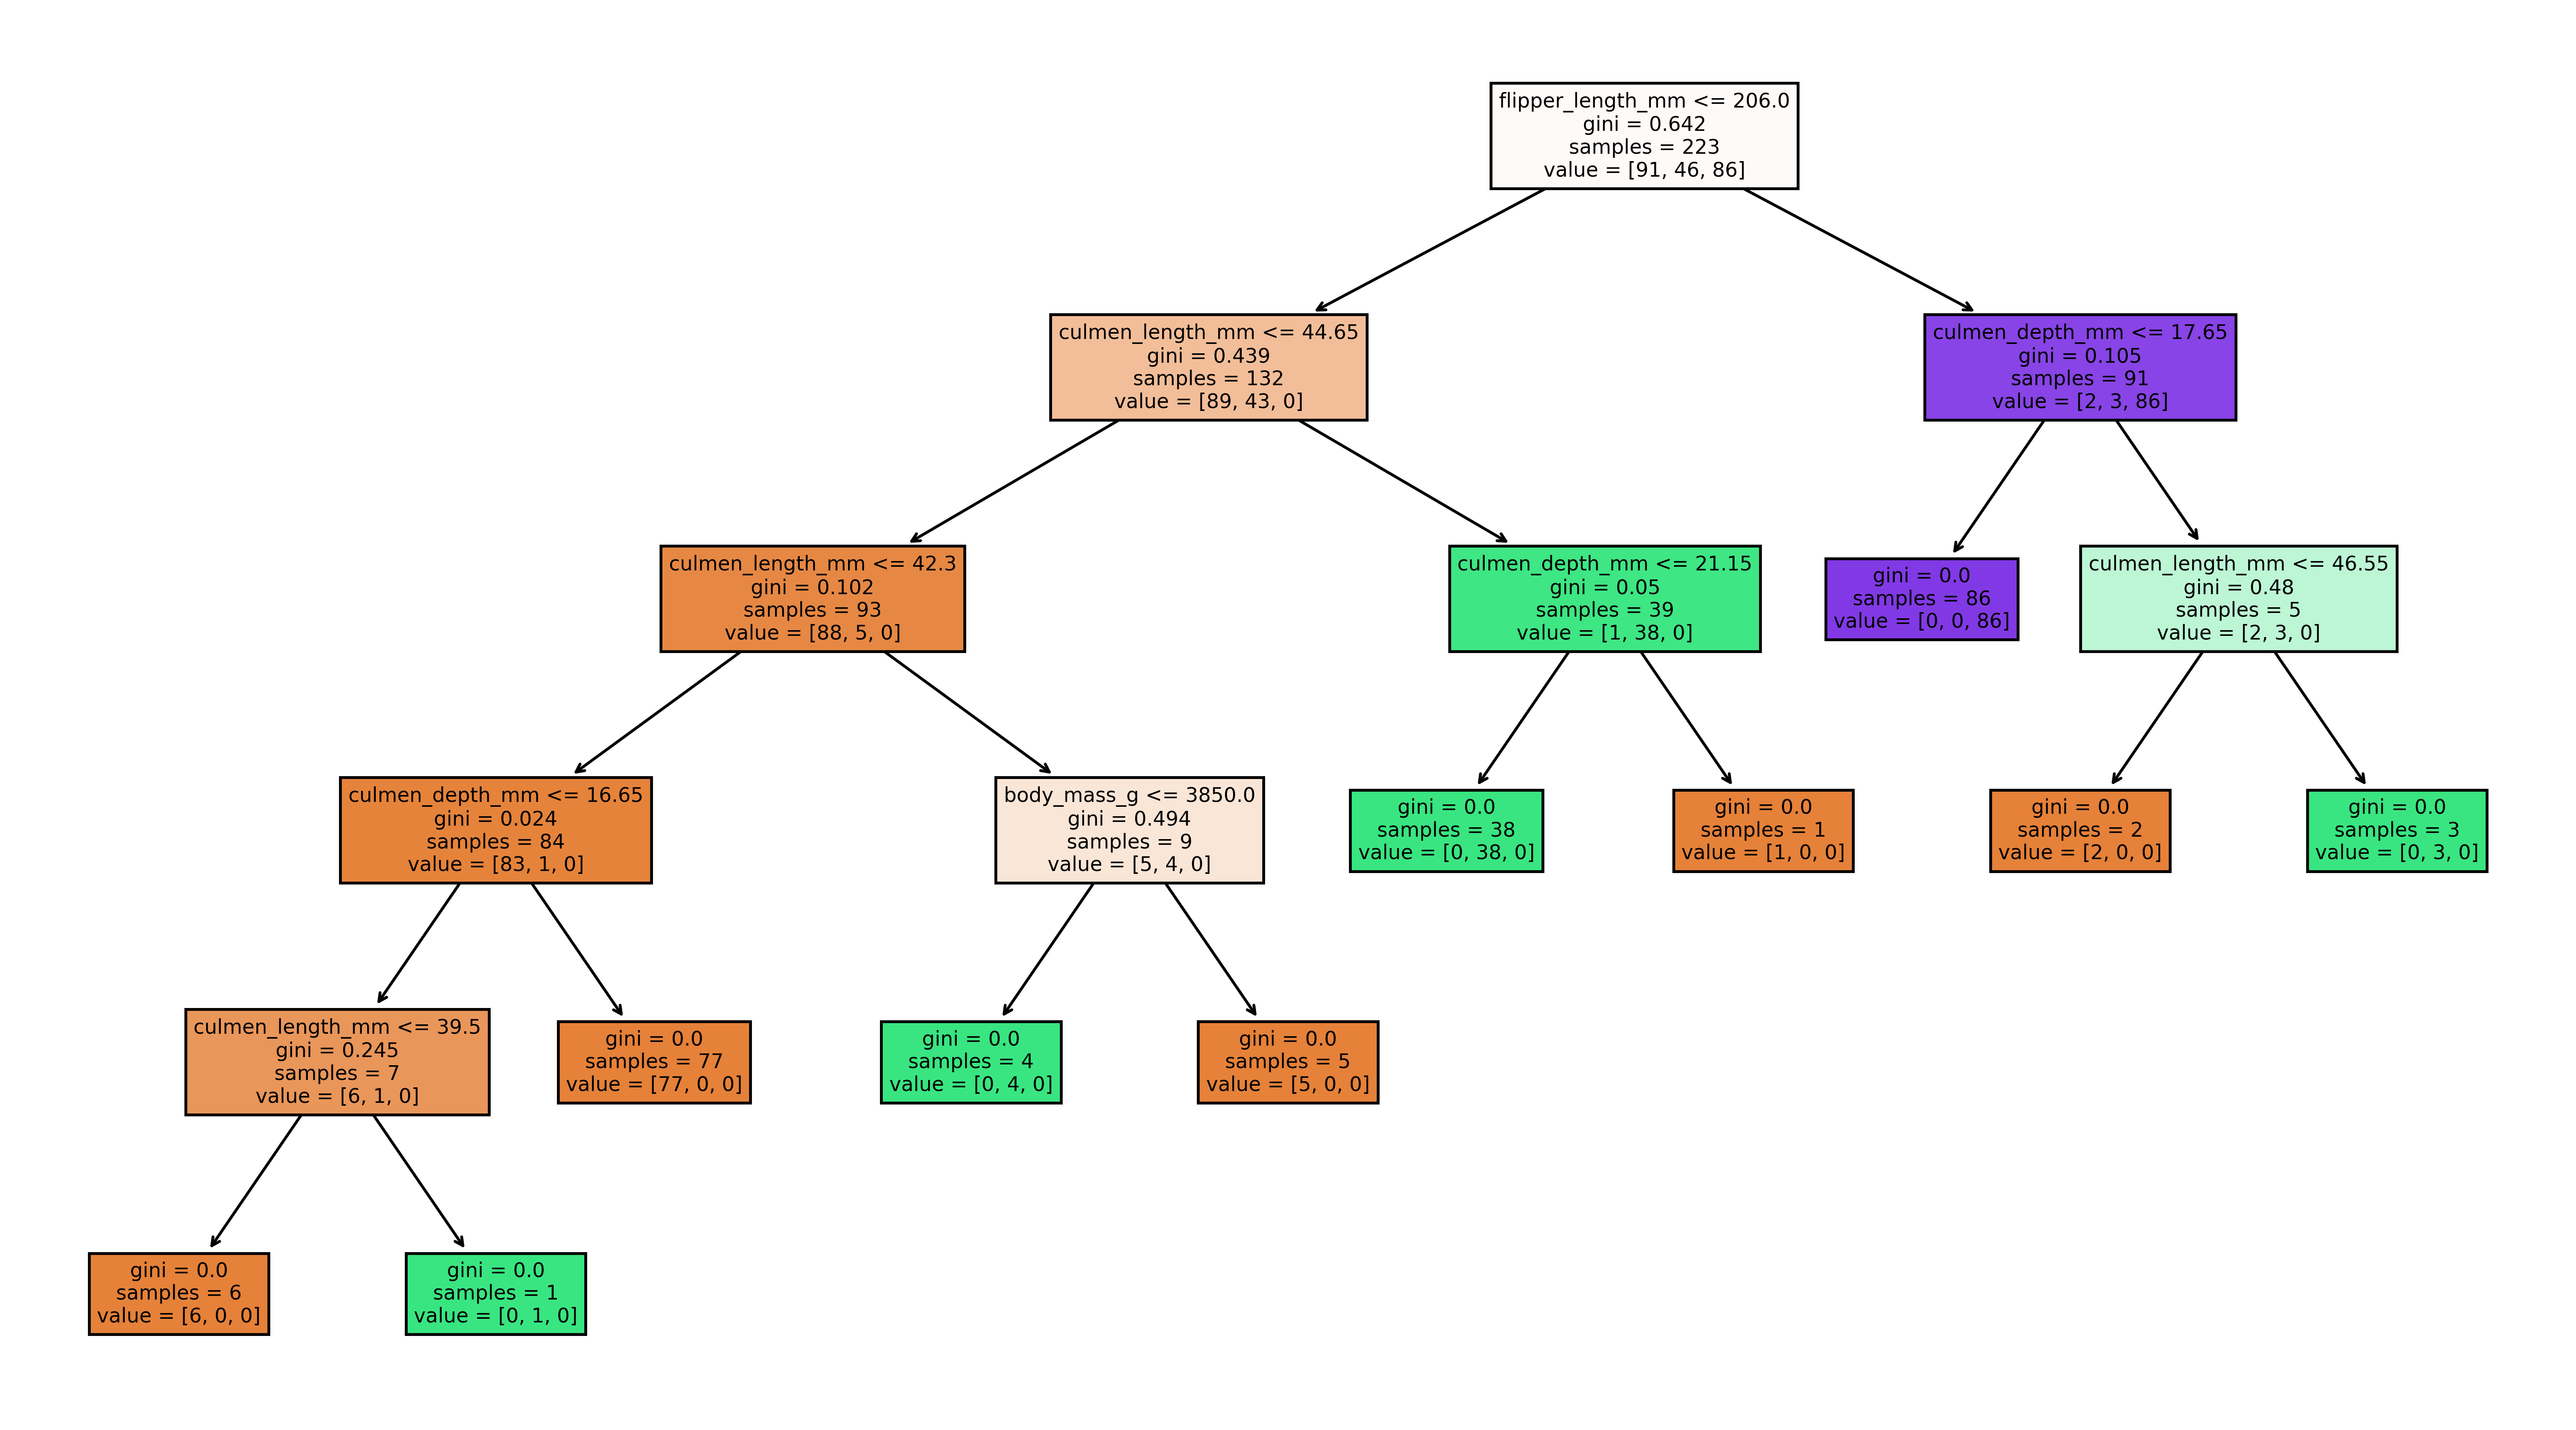

In [46]:
plt.figure(figsize=(16,9),dpi=500)
report_model(model)

## Understanding Hyperparameters

### Max Depth

In [47]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [48]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        55
   Chinstrap       0.86      0.86      0.86        22
      Gentoo       0.94      0.97      0.96        34

    accuracy                           0.95       111
   macro avg       0.93      0.93      0.93       111
weighted avg       0.95      0.95      0.95       111





<Figure size 8000x4500 with 0 Axes>

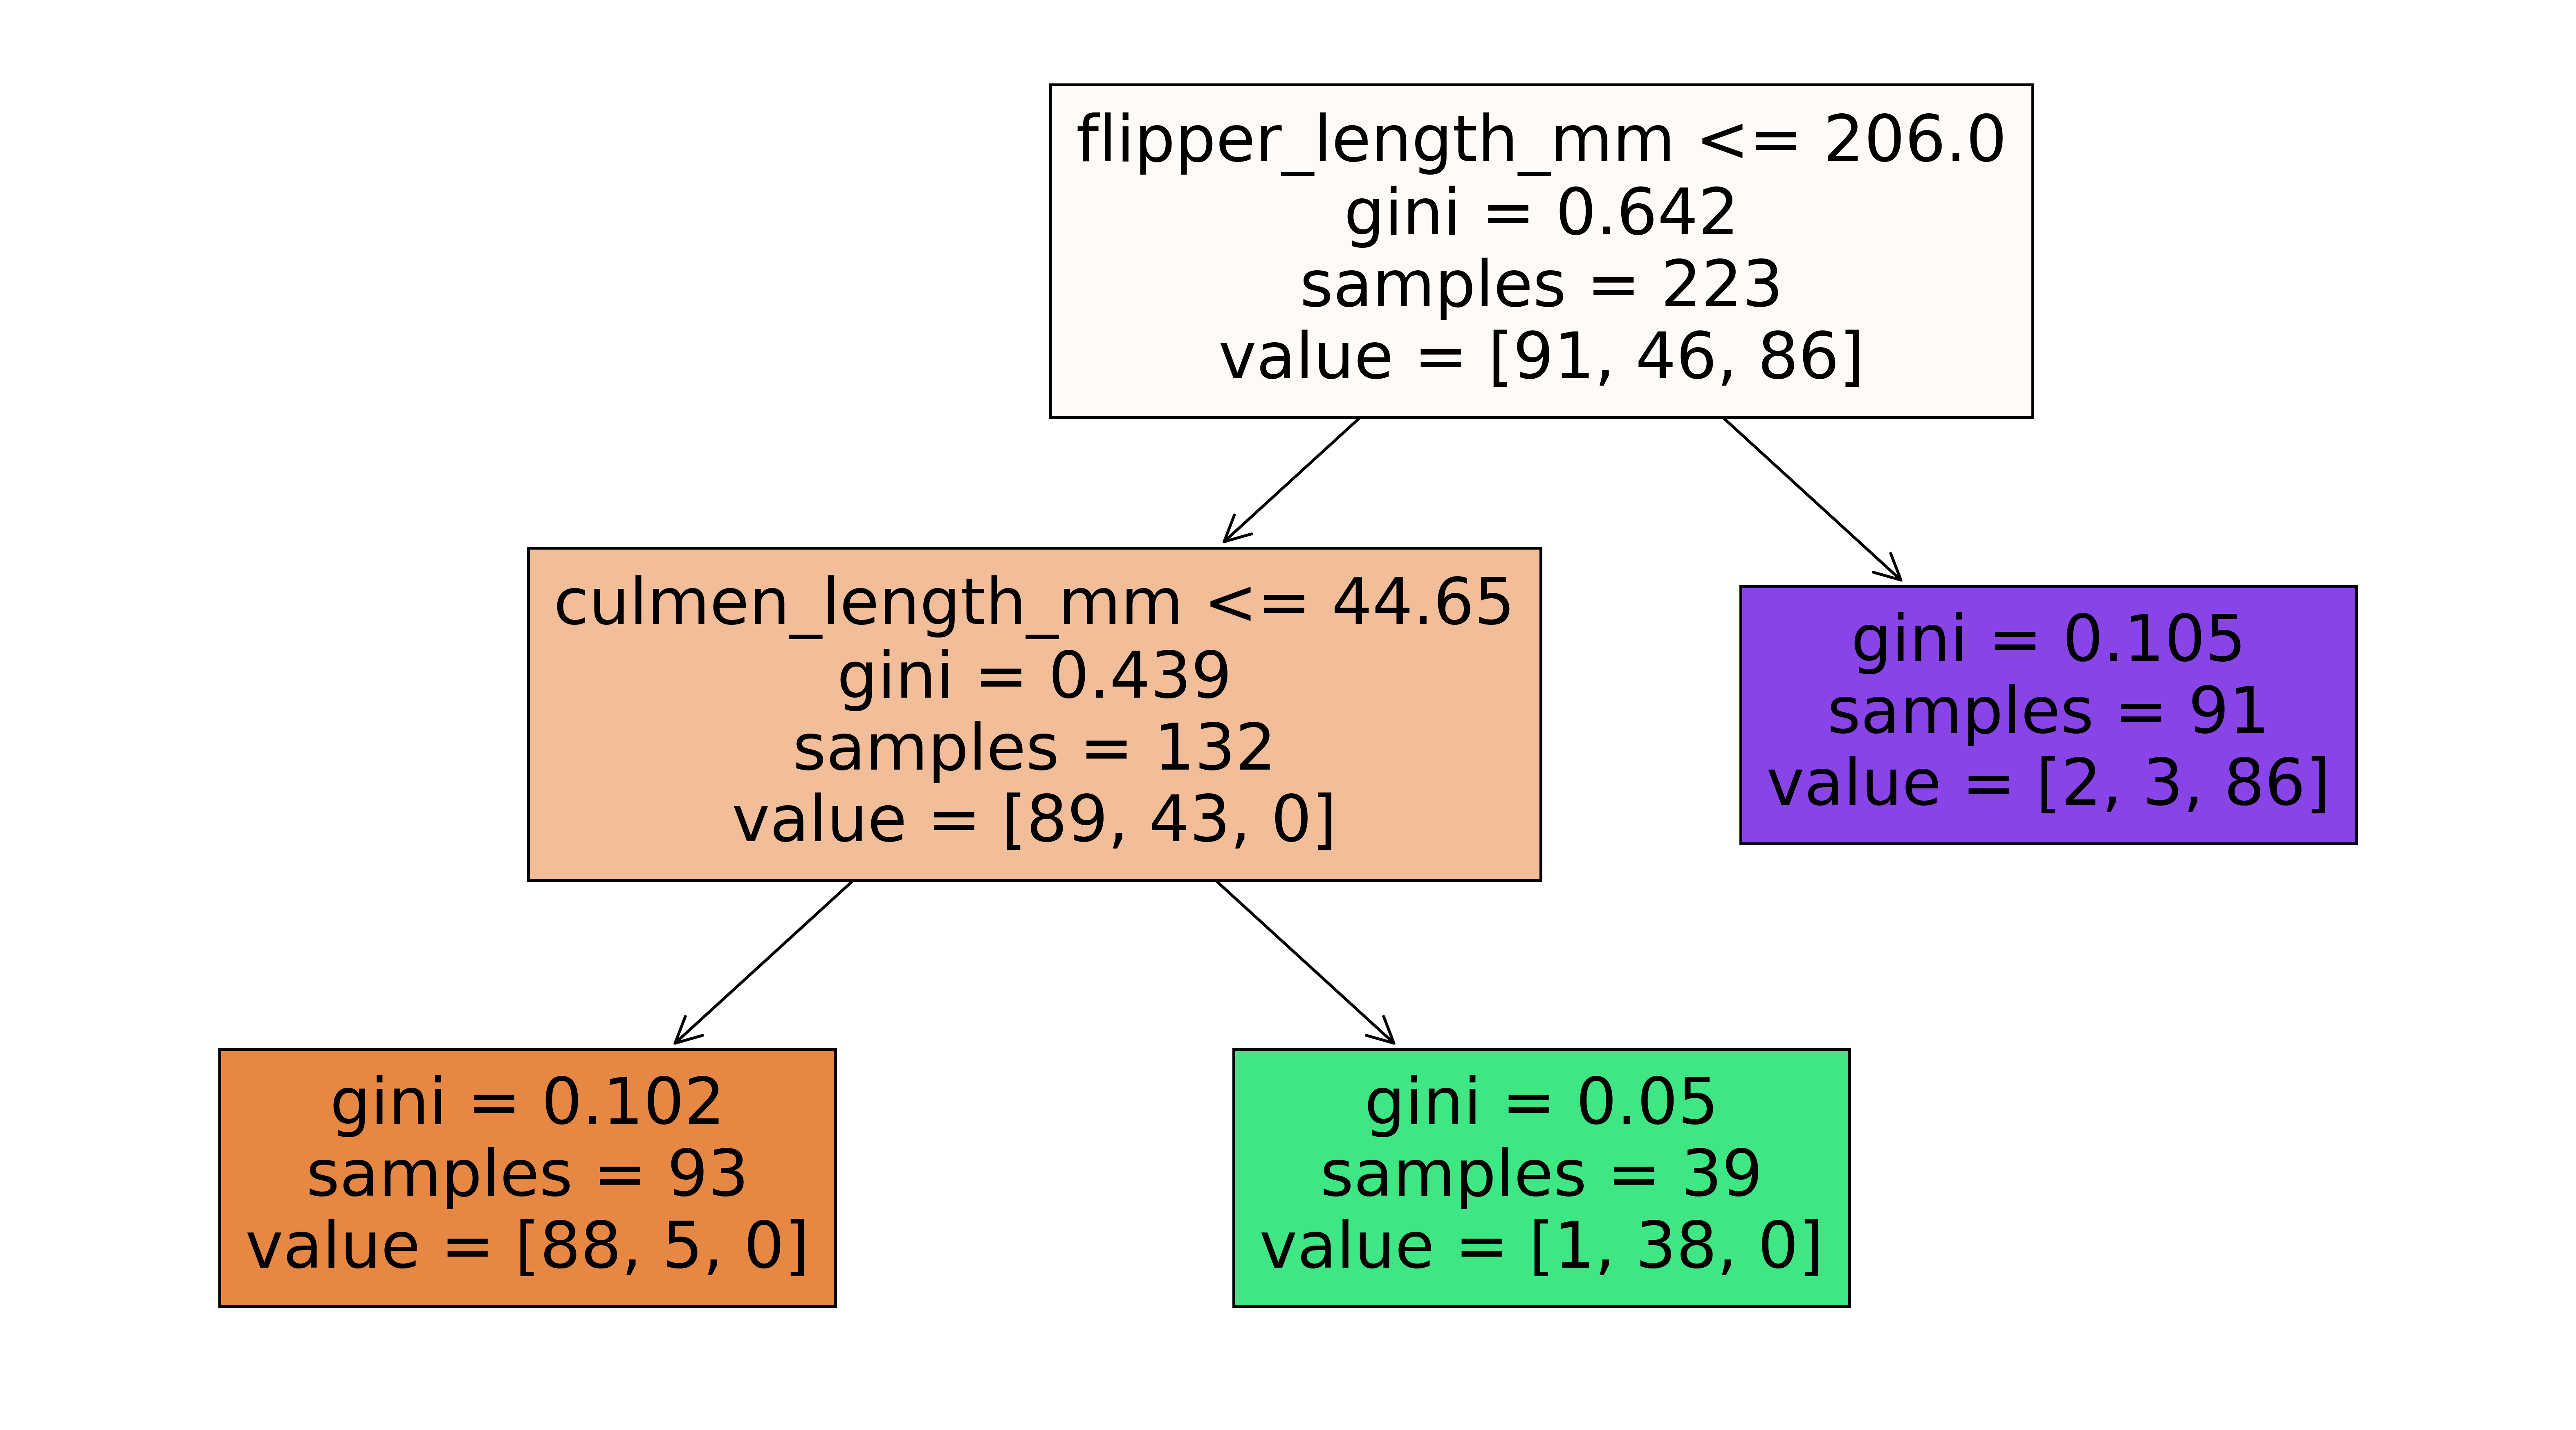

In [54]:
plt.figure(figsize=(16,9),dpi=500)
report_model(pruned_tree)

## Max Leaf Nodes

In [50]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        55
   Chinstrap       0.86      0.86      0.86        22
      Gentoo       0.94      0.97      0.96        34

    accuracy                           0.95       111
   macro avg       0.93      0.93      0.93       111
weighted avg       0.95      0.95      0.95       111





<Figure size 8000x4500 with 0 Axes>

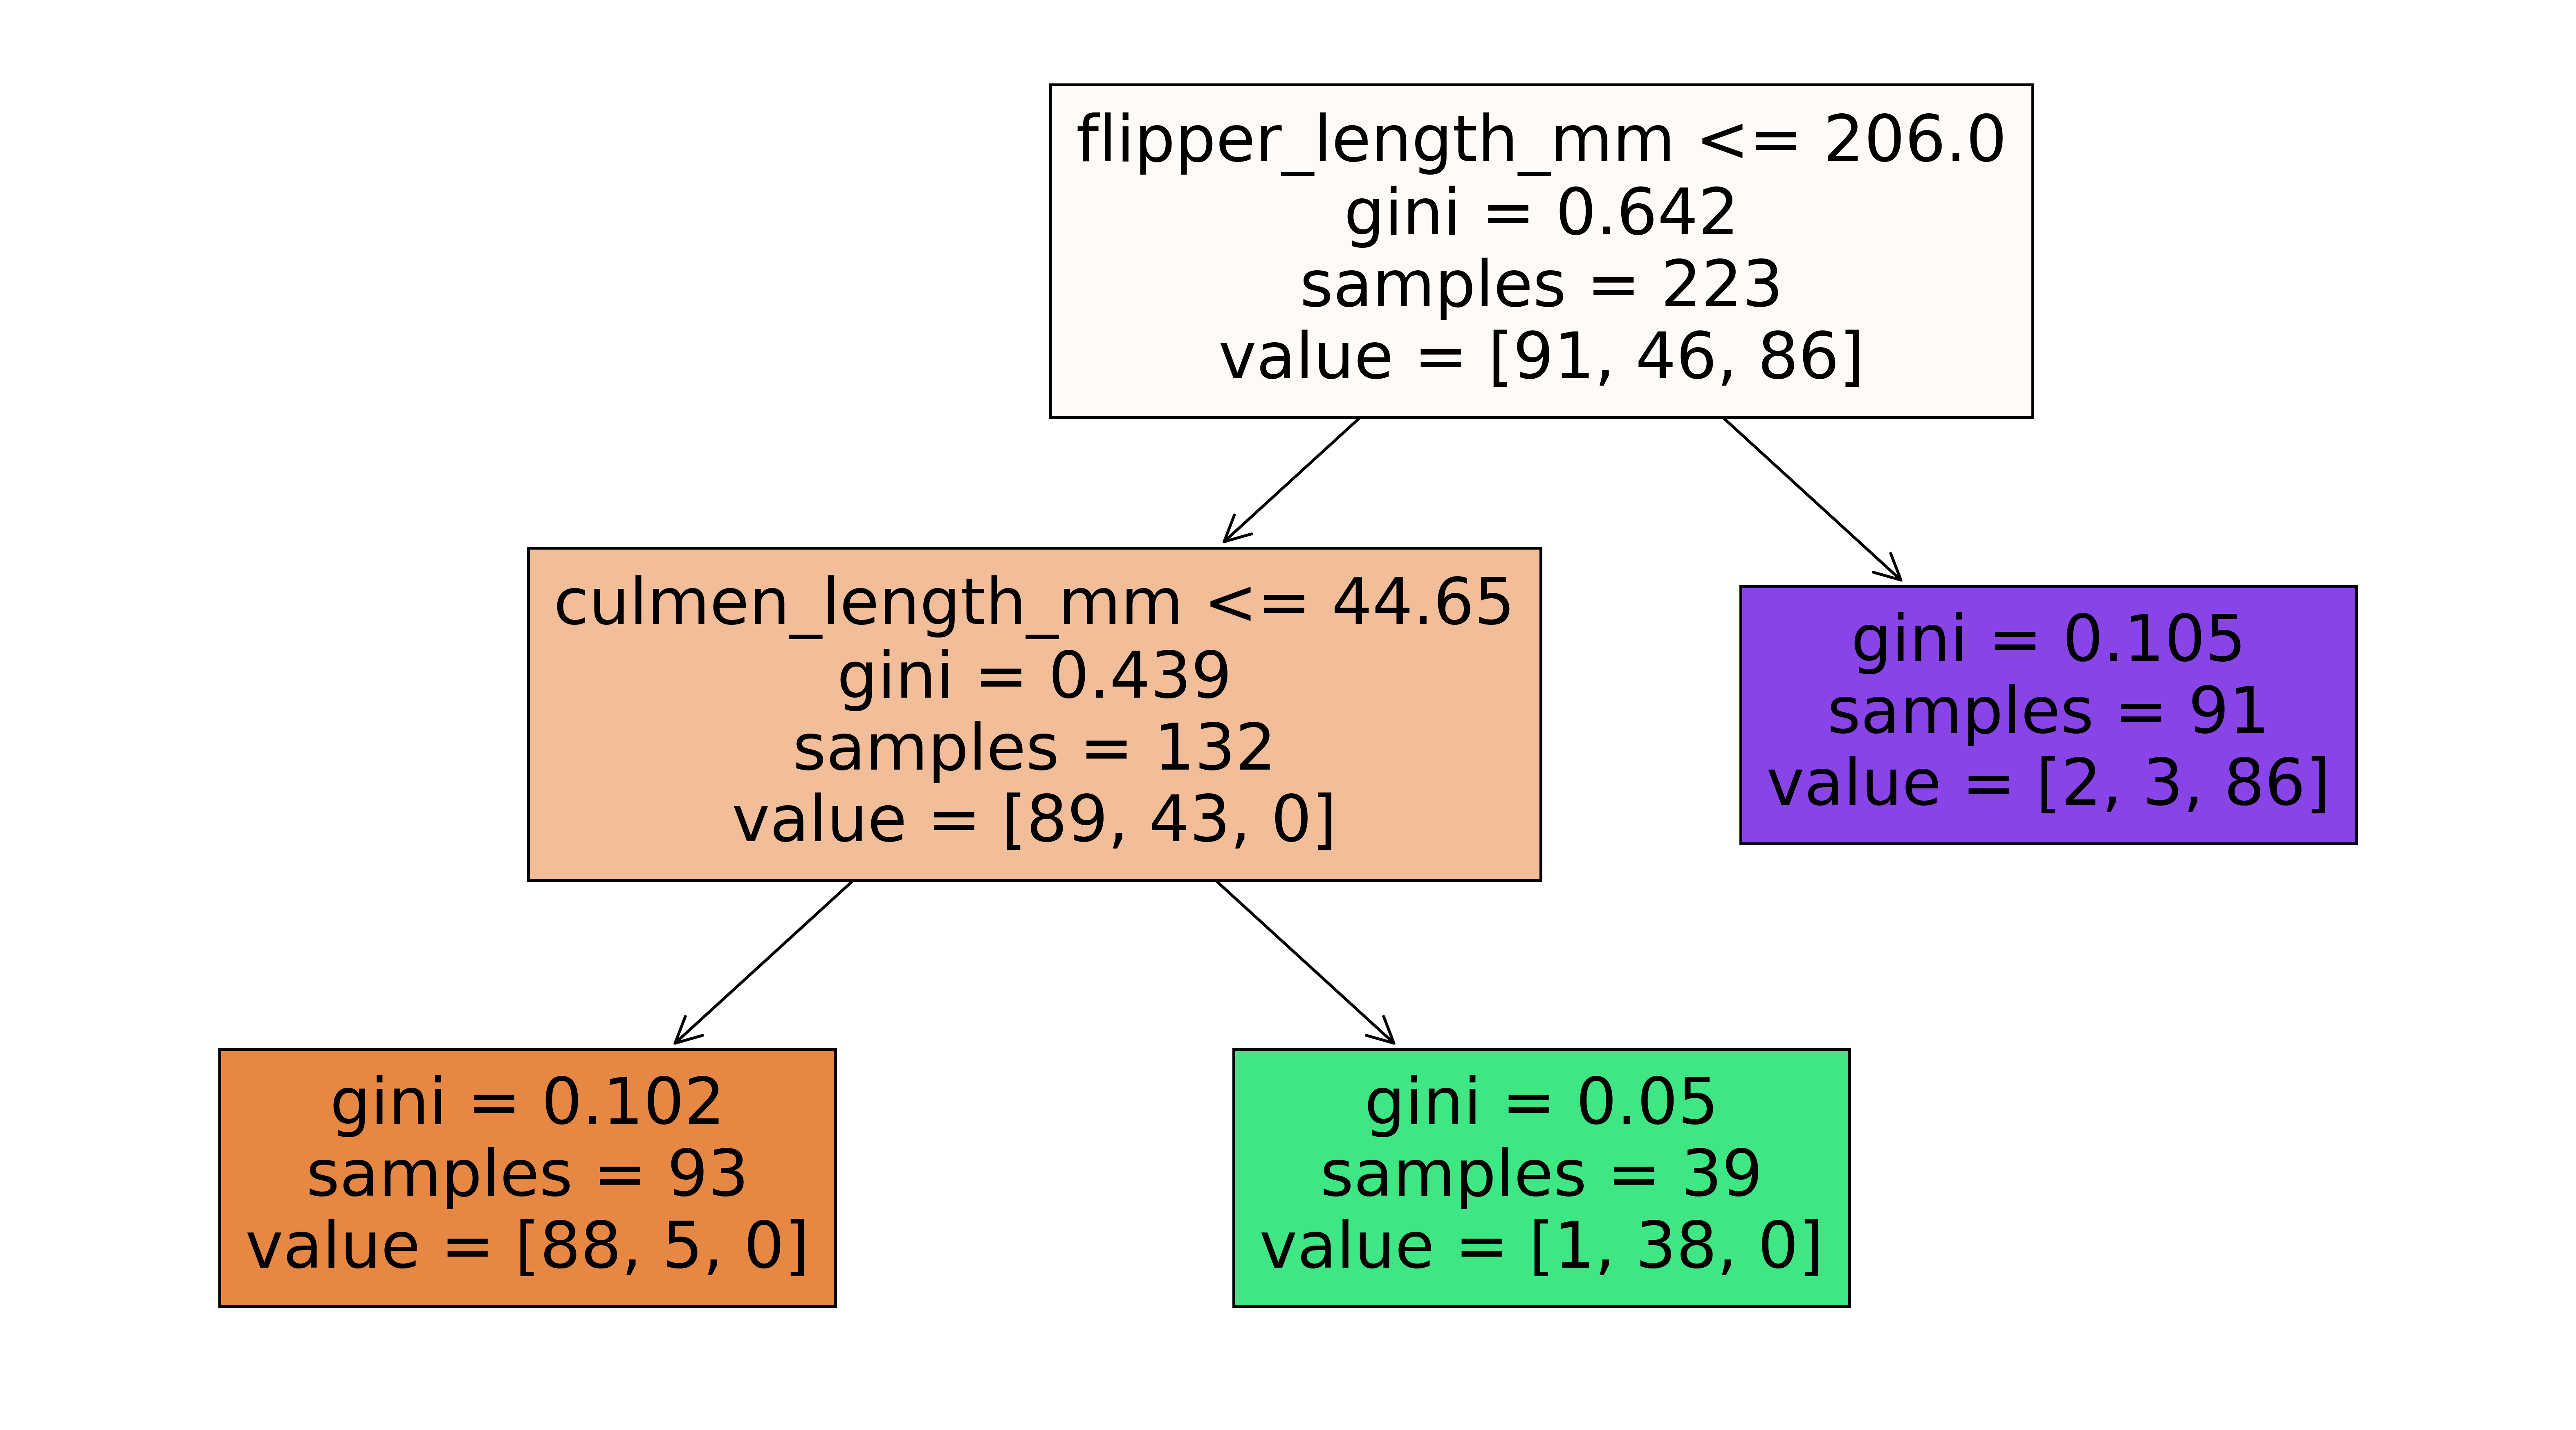

In [55]:
plt.figure(figsize=(16,9),dpi=500)
report_model(pruned_tree)

## Criterion

In [52]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.98      0.96      0.97        55
   Chinstrap       0.88      0.95      0.91        22
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.96       111
   macro avg       0.95      0.96      0.96       111
weighted avg       0.97      0.96      0.96       111





<Figure size 8000x4500 with 0 Axes>

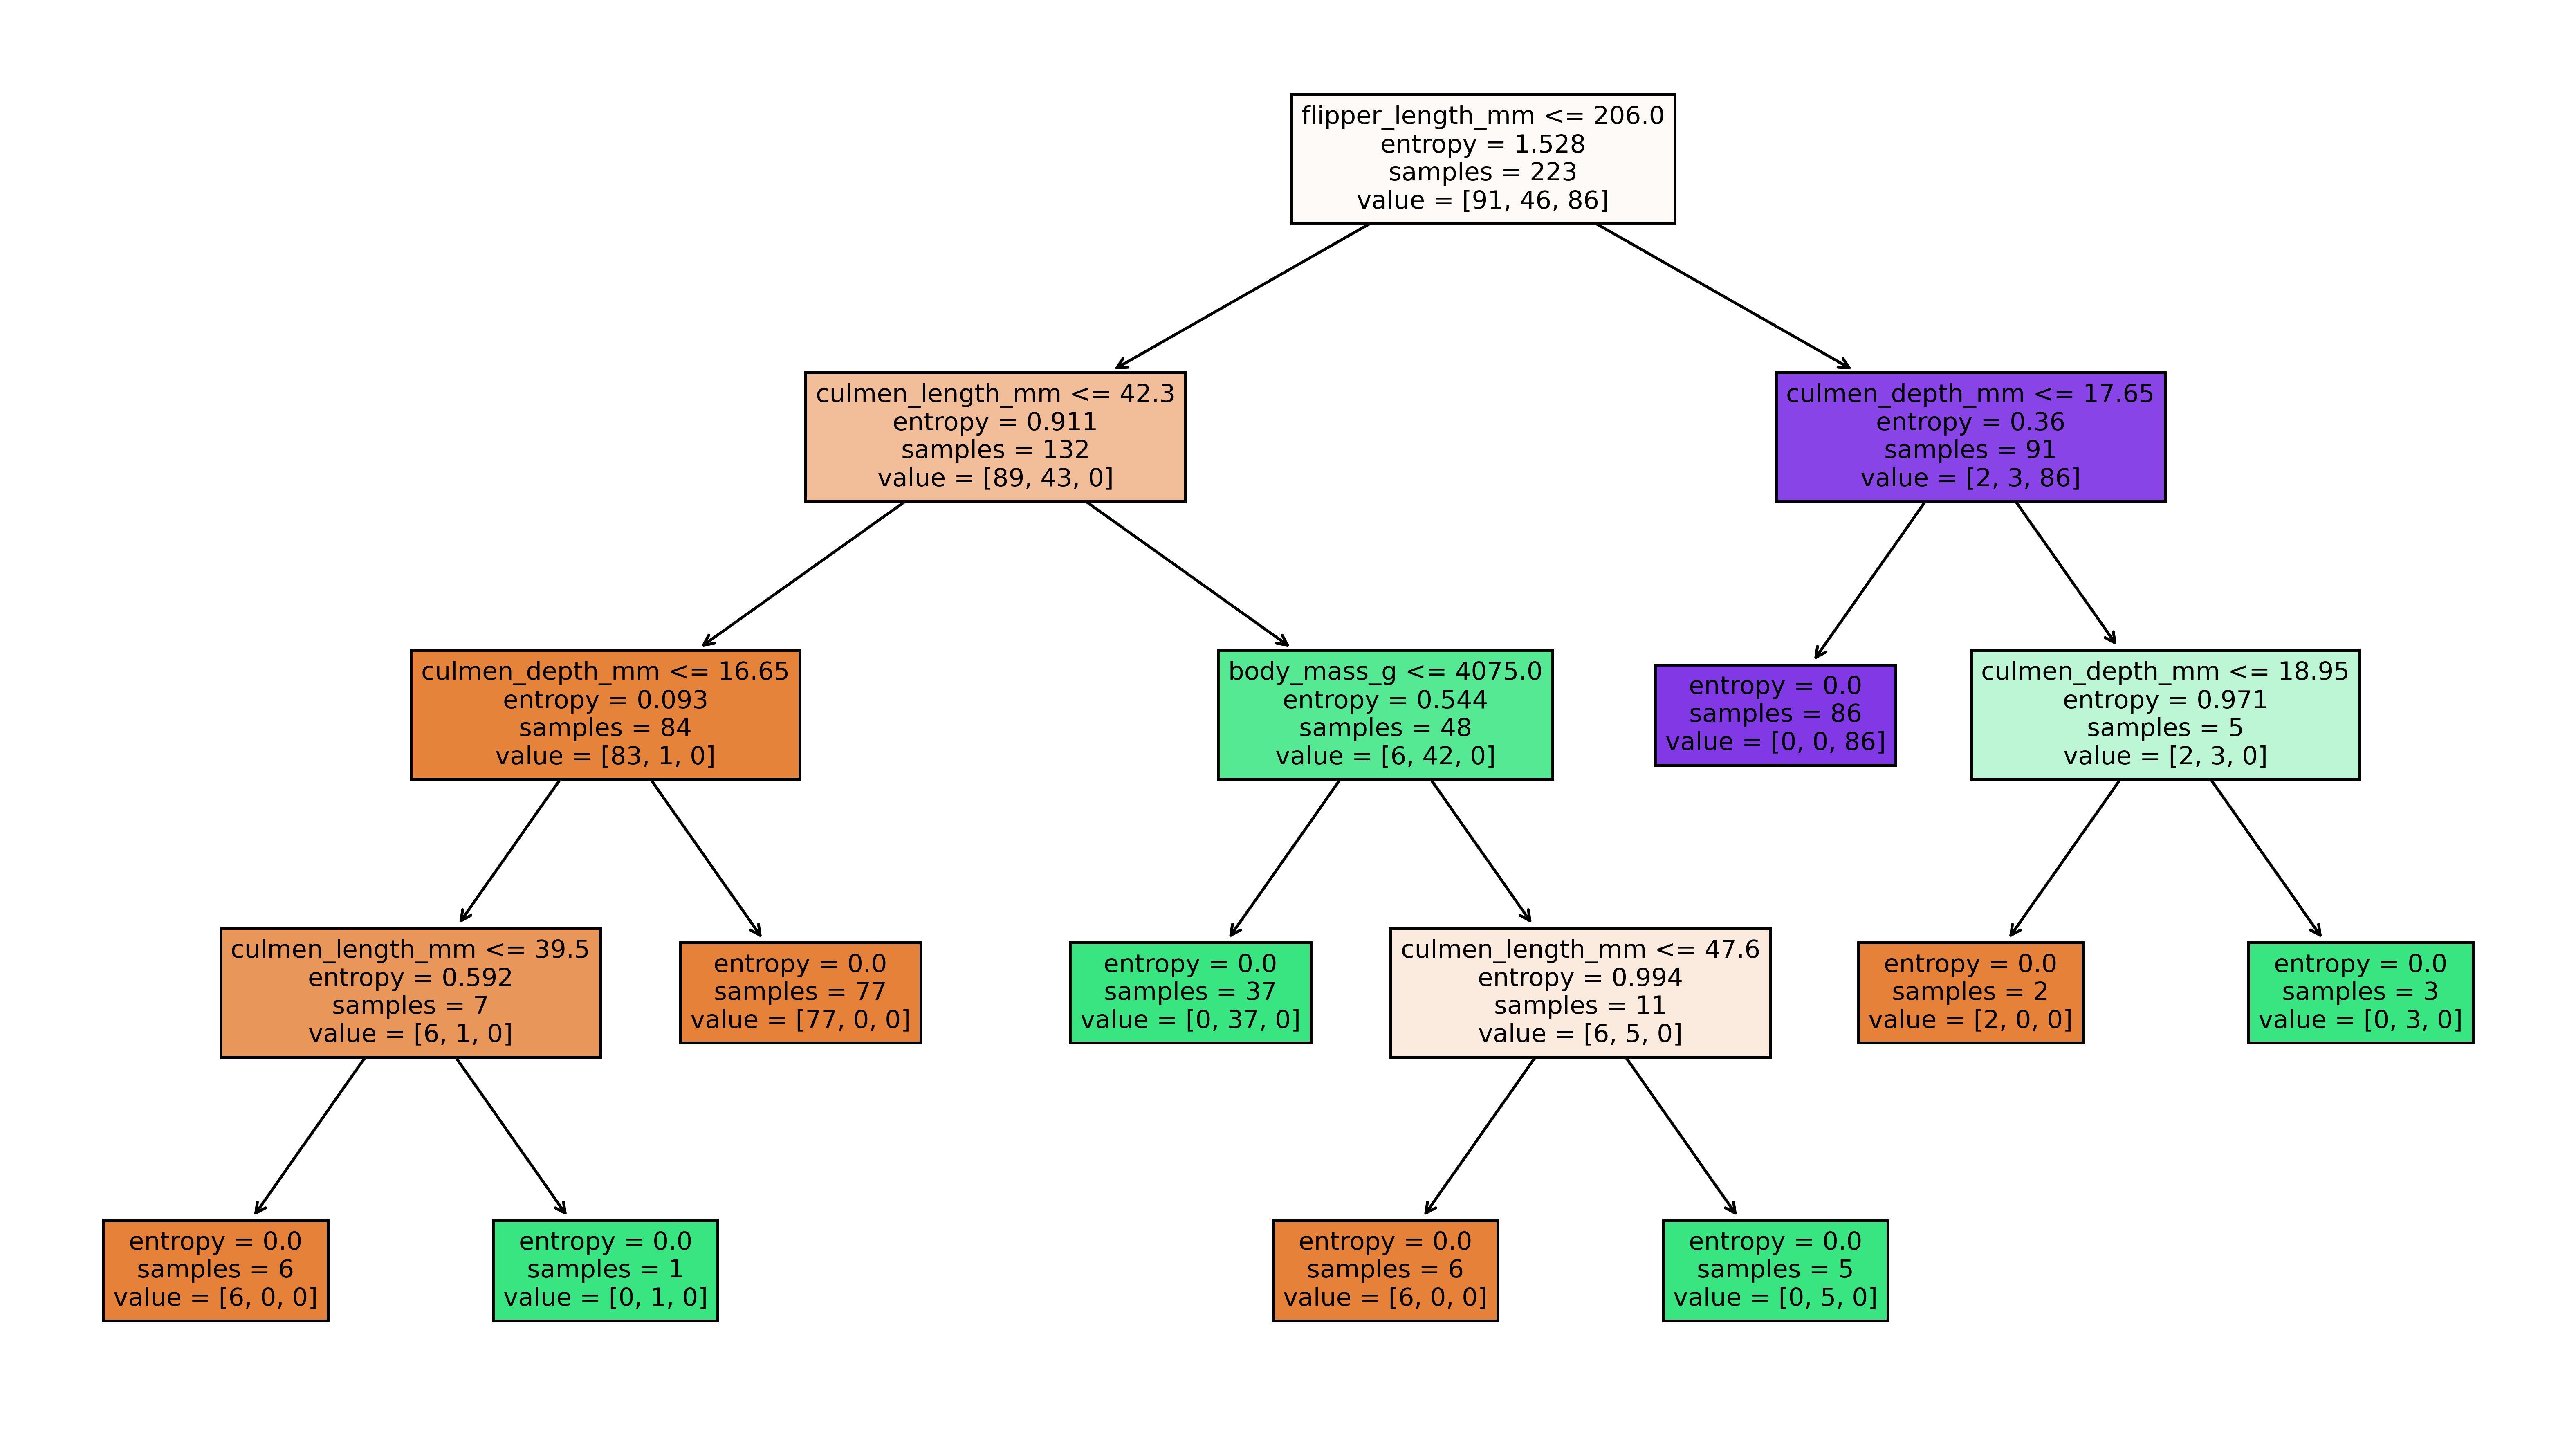

In [56]:
plt.figure(figsize=(16,9),dpi=500)
report_model(entropy_tree)

---